# 0.환경설정

## matplotlib 한글 폰트 설치

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 라이브러리 임포트

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumBarunGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

# 1.소상공인 데이터

- 사용 데이터 : 소상공인시장진흥공단_상가(상권)정보_20221231
	- 시점 : 2022년 12월 31일 기준
	- 지역 : 서울시 행정동
	- 항목(컬럼) : 상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등
	- 데이터수집 방법 : CSV 다운로드
	- 출처 : https://www.data.go.kr/data/15083033/fileData.do

## 1.1 데이터 전처리
- 전처리 과정 :
    - 1) 전체 소상공인 상가 정보 데이터 중 업종대분류 기준 '음식' 데이터만 추출
    - 2) 분류명 코드, 건물 정보, 우편 정보 등 불필요한 컬럼 제거

In [3]:
# 데이터 로드 -> store_df
store_df = pd.read_csv('/content/drive/MyDrive/eda프로젝트/소상공인시장진흥공단_상가(상권)정보_20221231/소상공인시장진흥공단_상가(상권)정보_서울_202212.csv')

In [4]:
# 데이터 값 확인
store_df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857


In [5]:
# 데이터 크기 확인
store_df.shape

(377724, 39)

In [6]:
# 컬럼명 확인
store_df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 업종대분류 항목 확인
store_df['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

In [8]:
# 외식 시장 분석이 목적이므로 외식업에 해당되는 업종 대분류 '음식' 기준으로 필터링 -> food_df
food_df = store_df[store_df['상권업종대분류명'] == '음식'].copy()

In [9]:
# 업종중분류 항목 확인
food_df['상권업종중분류명'].unique()

array(['한식', '유흥주점', '커피점/카페', '패스트푸드', '닭/오리요리', '중식', '양식', '제과제빵떡케익',
       '분식', '별식/퓨전요리', '기타음식업', '일식/수산물', '부페', '음식배달서비스'], dtype=object)

In [10]:
# 업종소분류 항목 확인
food_df['상권업종소분류명'].unique()

array(['한식/백반/한정식', '민속주점', '족발/보쌈전문', '곱창/양구이전문', '커피전문점/카페/다방', '토스트전문',
       '삼계탕전문', '중국음식/중국집', '패밀리레스토랑', '제과점', '떡전문', '부대찌개/섞어찌개',
       '국수/만두/칼국수', '죽전문점', '호프/맥주', '빠/카페/스탠드빠', '도시락전문점', '해장국/감자탕',
       '두부요리전문', '파전전문', '라면김밥분식', '후라이드/양념치킨', '구내식당/자급식음식점', '패스트푸드',
       '소주방/포장마차', '갈비/삼겹살', '정통양식/경양식', '돌솥/비빕밥전문점', '복전문', '도너츠전문',
       '로바다야끼', '룸살롱/단란주점', '횟집', '음식점-일식', '스파게티전문점', '기사식당', '갈치/생선구이',
       '아구전문', '떡볶이전문', '냉면집', '아이스크림판매', '종합부페', '찜닭전문점', '꼬치구이전문점',
       '순대전문점', '보드게임카페', '기타일반유흥주점', '해물찜/탕전문', '닭갈비전문', '추어탕전문',
       '순두부전문', '스낵', '닭내장/닭발요리', '곰장어전문', '생과일주스전문점', '기타전문서양음식점',
       '떡/한과집', '피자전문', '참치전문점', '우동전문점', '설렁탕집', '전통찻집/인삼찻집', '홍어전문',
       '야식집', '오리고기전문', '한정식전문', '음식점-초밥전문', '샌드위치전문점', '민물장어전문', '바베큐전문',
       '돈가스전문점', '핫도그', '낙지/오징어', '샤브샤브전문', '기타고기요리', '매운탕전문',
       '수산물전문음식점-종합', '음식출장조달', '퓨전음식전문', '게장전문', '동남아음식전문점', '사철탕전문',
       '철판구이요리전문', '보리밥전문', '쌈밥전문', '고등어전문', '국/찌개배달', '황태전문', '스테이크전문점',
       '고기부페'

In [11]:
food_df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [12]:
# 전체 컬럼 중 불필요한 컬럼 제거 -> food_df_new
drop_col = ["상가업소번호", "상권업종대분류코드", "상권업종중분류코드", "상권업종소분류코드",
            "표준산업분류코드", "시도코드","지번코드", '대지구분코드', '대지구분명', '지번본번지',
            '지번부번지', '도로명코드', '건물본번지', '건물부번지', '건물관리번호', '건물명',
            '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보', '호정보']
food_df_new = food_df.drop(columns = drop_col, axis = 1)
food_df_new = food_df_new.reset_index(drop = True)

In [13]:
food_df_new.head(2)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번주소,도로명,경도,위도
0,비지트,NaN,음식,한식,한식/백반/한정식,한식 음식점업,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,126.991394,37.488375
1,쓰리에프,NaN,음식,한식,한식/백반/한정식,한식 음식점업,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,126.980952,37.487105


## 1.2 서울시 자치구별 외식업 점포수 시각화
- 분석 및 시각화 과정 :
    - 1) 시군구명으로 그룹화한 후 점포수 카운트
    - 2) 점포수 기준 내림차순 정렬
    - 3) seaborn barplot을 통해 시각화

- 분석 결과 :
    - 강남구가 12270개로 가장 많았으며 마포구, 송파구, 강서구, 서초구 순으로 집계됨
    - 자치구별 평균 점포수는 5030개이며 평균 보다 큰 지역은 보통 유동인구가 많은 상업지역으로 보임

In [14]:
# 시군구명 기준 그룹화한 후 점포수 count 집계 및 내림차순 정렬 -> sigungu_food_count
sigungu_food_count = food_df_new.groupby("시군구명").count()['상호명'].sort_values(ascending = False).reset_index()
# 상호명 컬럼을 점포수로 변경
sigungu_food_count.rename(columns = {"상호명":"점포수"}, inplace = True)
sigungu_food_count.head(10)

,시군구명,점포수
0,강남구,12270
1,마포구,8183
2,송파구,7641
3,강서구,6675
4,서초구,6302
5,영등포구,5761
6,종로구,5225
7,중구,4967
8,강동구,4888
9,관악구,4806


In [15]:
# 자치구별 점포수 기초 통계량 확인 및 평균 점포수 확인
display(sigungu_food_count['점포수'].describe())
mean_count = sigungu_food_count['점포수'].mean()
print('서울시 자치구 평균 점포수 : {}'.format(mean_count))

count       25.000000
mean      5030.840000
std       2005.434506
min       2686.000000
25%       3976.000000
50%       4500.000000
75%       5225.000000
max      12270.000000
Name: 점포수, dtype: float64

서울시 자치구 평균 점포수 : 5030.84


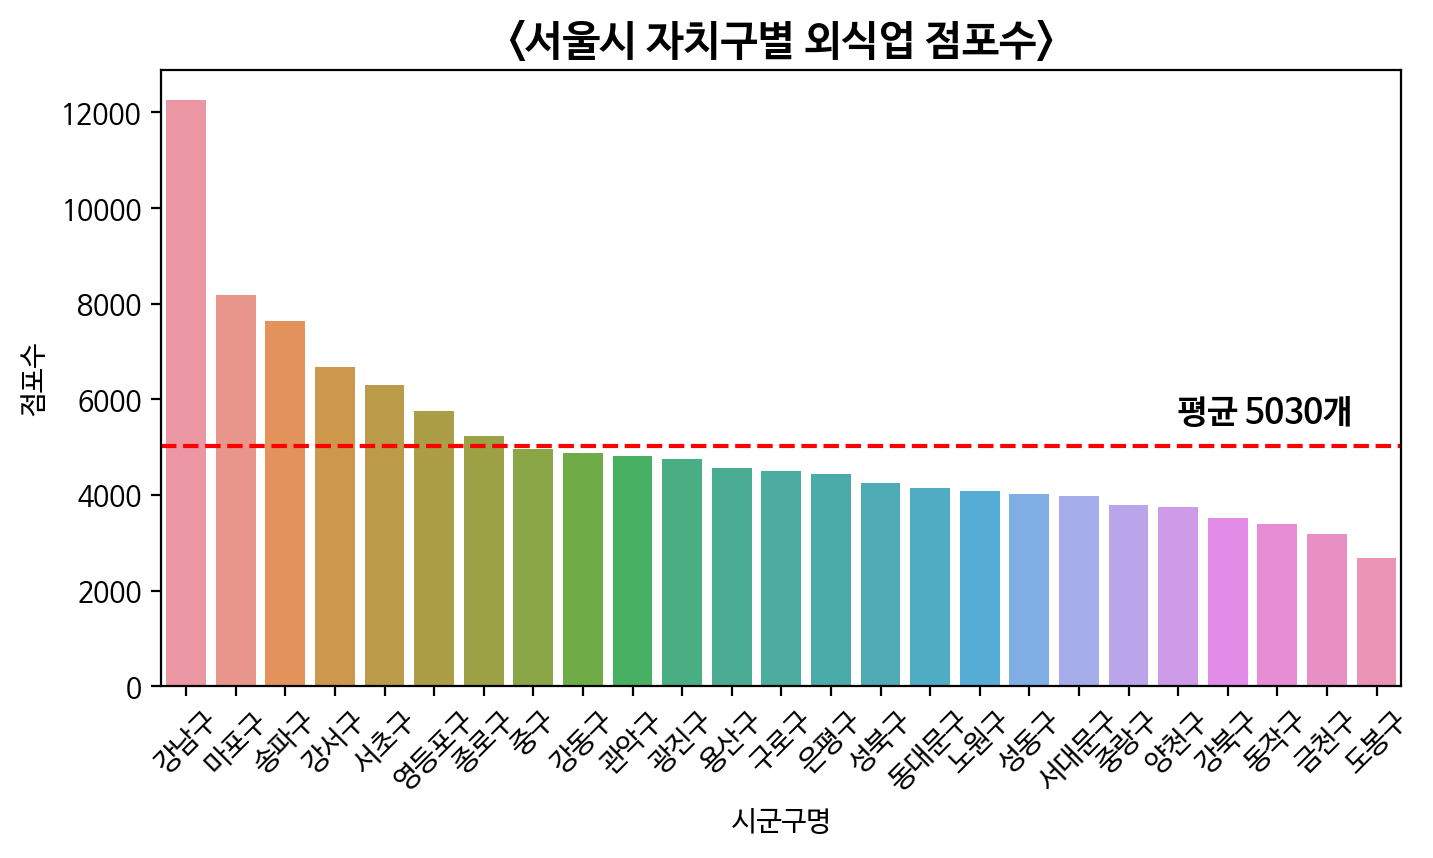

In [16]:
# 집계된 내역을 막대 그래프로 시각화
plt.figure(figsize = (8,4))
sns.barplot(data = sigungu_food_count, x = '시군구명', y = '점포수')
plt.title("<서울시 자치구별 외식업 점포수>", fontsize = 15, fontweight = 'bold')
plt.axhline(y = mean_count, ls = '--', color = 'r')
plt.text(x = 20, y = mean_count * 1.1, s = '평균 5030개', fontsize = 12, fontweight = 'semibold')
plt.xticks(rotation = 45)
plt.show()

## 1.3 서울시 외식업 업종별 비중 시각화

- 상권 분류 기준 선택 :

    - 업종을 분류할 수 있는 기준에는 여러 방식이 있음
        - 표준산업분류명
        - 상권업종중분류명
    - 현 분석에서는 생활과 밀접한 용어로 정의되어 있는 **'상권업종중분류명'**을 기준으로 분석을 진행

- 분석 및 시각화 과정 :

    - 1) 업종분류명을 기준으로 그룹화한 후 점포수를 전체 점포수로 나누어 비율로 환산
    - 2) 점포수 비율 기준 내림차순 정렬
    - 3) seaborn barplot을 통해 시각화

- 분석 결과 :
    - 한식 업종이 전체 점포수 중 가장 많은 수를 차지하고 있고, 전체 중 30% 비중을 차지하고 있음
    - 카페와 주류 등 음료와 같은 업종 비중이 상당히 많음
    - 일반적인 많은 사람들이 생각했던 것보다 치킨 전문점의 수가 적은 편임

In [17]:
# 업종분류명 항목 확인
print(food_df_new["표준산업분류명"].unique())
print(food_df_new["상권업종중분류명"].unique())

['한식 음식점업' '기타 주점업' '비알콜 음료점업' '피자, 햄버거, 샌드위치 및 유사 음식점업' '중식 음식점업'
 '서양식 음식점업' '제과점업' '분식 및 김밥 전문점' '일반유흥 주점업' '치킨 전문점' '기관구내식당업'
 '그외 기타 음식점업' '일식 음식점업' nan '이동 음식업' '출장 음식 서비스업' '기타 외국식 음식점업']
['한식' '유흥주점' '커피점/카페' '패스트푸드' '닭/오리요리' '중식' '양식' '제과제빵떡케익' '분식' '별식/퓨전요리'
 '기타음식업' '일식/수산물' '부페' '음식배달서비스']


In [18]:
# 표준산업분류명을 기준으로 점포수 내림차순 정렬 -> sigungu_small_count
sigungu_small_count = food_df_new.groupby("상권업종중분류명").count()['상호명'].sort_values(ascending = False).reset_index()
sigungu_small_count.rename(columns = {"상호명":"점포수"}, inplace = True)
sigungu_small_count.head(10)

,상권업종중분류명,점포수
0,한식,41045
1,커피점/카페,21620
2,유흥주점,12049
3,분식,10088
4,일식/수산물,8487
5,양식,7435
6,패스트푸드,6057
7,닭/오리요리,5769
8,제과제빵떡케익,5676
9,중식,3892


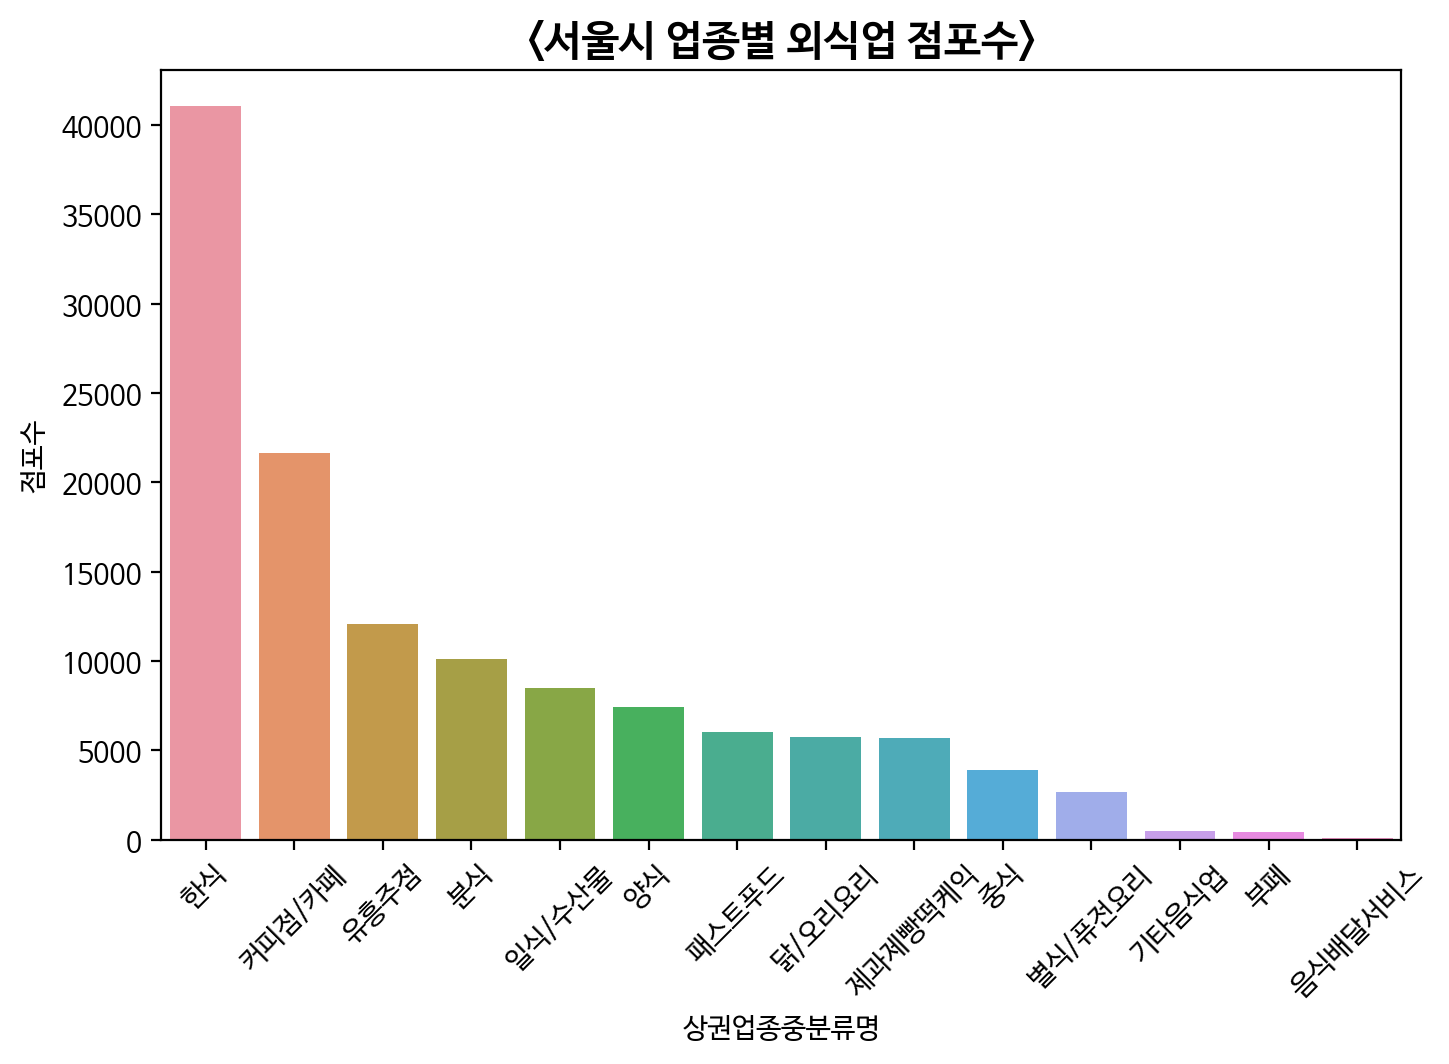

In [19]:
# 표준산업분류명 기준 점포수 시각화
plt.figure(figsize = (8,5))
sns.barplot(data = sigungu_small_count, x = '상권업종중분류명', y = '점포수')
plt.title("<서울시 업종별 외식업 점포수>", fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

In [20]:
import plotly.express as px
import plotly.graph_objects as go

# 각 기준별로 점포수를 시각화 하여 비교
# fig = px.pie(sigungu_small_count, values = '점포수', names = '상권업종중분류명', title = '<서울시 업종중분류별 비중>', color = 'Set3')

fig = go.Figure(data=[go.Pie(labels=sigungu_small_count['상권업종중분류명'], values=sigungu_small_count['점포수'], hole=.4)])
# plt.title("<서울시 업종중분류별 비중>", fontsize = 15, fontweight = 'bold')
fig.update_layout(
    autosize=False,
    width=700,
    height=500
)

fig.update_yaxes(automargin='left+top')
fig.show()

## 1.4 서울시 행정동별 외식업 점포수 지도 시각화

- 분석 및 시각화 과정 :
    - 1) 서울시 행정동별 외식업 점포수를 folium 지도로 시각화
    - 2) 점포수가 상대적으로 많은 지역은 붉은색, 상대적으로 적은 지역은 파란색으로 표시
    - 3) 지역구별 색상 비교는 5개의 분위수를 기준으로 4단계로 표현

In [21]:
import folium
import json
from folium import plugins

In [22]:
seoul_area_json = '/content/drive/MyDrive/eda프로젝트/HangJeongDong_ver20230701.geojson'
seoul_area = json.load( open(seoul_area_json) )

In [23]:
# 지도 시각화를 위해 원본 데이터를 복사하여 새로운 df로 구성 -> seoul_food
seoul_food = food_df_new.copy()
seoul_food.head(1)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번주소,도로명,경도,위도
0,비지트,NaN,음식,한식,한식/백반/한정식,한식 음식점업,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,126.991394,37.488375


In [24]:
# seoul_food[seoul_food['법정동명'] == '사직동'].iloc[[0,1],:]

In [25]:
# 시군구명, 행정동명, 행정동코드를 그룹화하여 업종수를 집계
seoul_food_div = seoul_food.groupby(['시군구명', '행정동명', '행정동코드'])['상호명'].count().reset_index()
seoul_food_div.rename(columns = {'상호명':'점포수'}, inplace = True)

In [26]:
seoul_food_div.head(3)

,시군구명,행정동명,행정동코드,점포수
0,강남구,개포1동,1168066000,7
1,강남구,개포2동,1168067000,126
2,강남구,개포4동,1168069000,199


In [27]:
# seoul_area['features'][0]

In [28]:
# for idx, sigun_dict in enumerate(seoul_food_div['features']):
#     sigun_id = sigun_dict['properties']['merged']
#     sigun_nmm = df.loc[(df.sigun_code == sigun_id), 'sigun_nm'].iloc[0]
#     risk = df.loc[(df.sigun_code == sigun_id), '총인구수 (명)'].iloc[0]
#     people = df.loc[(df.sigun_code == sigun_id),  '남자인구수 (명)'].iloc[0]
#     people_w = df.loc[(df.sigun_code == sigun_id),  '여자인구수 (명)'].iloc[0]
#     txt = f'<b><h4>{sigun_nmm}</h4></b>총인구수(명) :{risk:.2f}<br>남자인구수(명) : {people}<br>여자인구수(명) : {people_w}'

#     state_geo1['features'][idx]['properties']['tooltip1'] = txt


# for idx, store in enumerate(seoul_food_div.values):
#     sigun = store[0]
#     dong = store[1]
#     count = store[3]
#     txt = f'<b><h4>{sigun} {dong}</h4></b>외식업체 수:{count}'
#     break


In [29]:
# 지도 띄우기
seoul_map = folium.Map(
    location = [37.5518911,126.9917937]
    , tiles = 'CartoDB dark_matter'
    , max_zoom = 12
    , min_zoom = 12
)

# 점포수 사분위 기준 bin구간 값 구하기
bins = list(seoul_food_div["점포수"].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data     = seoul_area, # 행정구역 정보
    name = 'sigungu_store',
    fill_color   = 'RdYlBu_r',
    fill_opacity = 0.3,
    line_opacity = 0.3,
    key_on       = 'properties.adm_cd2', # GPS데이터와 매칭되는 키의 위치 지정
    data         = seoul_food_div,
    columns      = ['행정동코드', '점포수'],
    legend_name = 'seoul food store',
    bins = bins
).add_to(seoul_map)

seoul_map

Output hidden; open in https://colab.research.google.com to view.

# 2.주민등록인구 데이터

- 사용 데이터 : 서울시 주민등록인구(구별) 통계
	- 시점 : 2023 1/4(1분기)
	- 지역 : 서울시 행정구
	- 항목(컬럼) : 세대, 계, 한국인, 등록외국인, 인구밀도, 세대당인구, 65세 이상 고령자
	- 데이터수집 방법 : CSV 다운로드
	- 출처 : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do


## 2.1 데이터 전처리
- 1) 서울시 자치구별 주민등록인구 중 필요한 데이터만 추출하여 데이터 형식 변환
- 2) 소상공인데이터 중 자치구별 점포수 데이터와 결합

In [30]:
pop = pd.read_csv('/content/drive/MyDrive/eda프로젝트/주민등록인구_20230819192714.csv', header = 1)

In [31]:
# 서울시 1/4분기 2/4분기 중 1/4분기만 선택
seoul_pop = pop.iloc[2:, 1:9]

In [32]:
# 시군구별 데이터만 추출한 후 불필요한 컬럼 제거
seoul_pop = seoul_pop[seoul_pop['동별(3)'] == '소계']
seoul_pop = seoul_pop.rename(columns = {'동별(2)':'시군구명'}).reset_index(drop = True)
seoul_pop.drop('동별(3)', axis = 1, inplace = True)

In [33]:
# 문자열로 되어 있는 변수값들을 숫자형으로 변환
seoul_pop.iloc[:,1:] = seoul_pop.iloc[:,1:].astype(float)

In [34]:
seoul_pop.head()

,시군구명,세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
0,종로구,72679.0,152212.0,141060.0,11152.0,1.94,28265.0
1,중구,63862.0,131390.0,120963.0,10427.0,1.89,25353.0
2,용산구,109735.0,232482.0,217756.0,14726.0,1.98,39478.0
3,성동구,133513.0,287240.0,280240.0,7000.0,2.1,48238.0
4,광진구,169787.0,350925.0,336801.0,14124.0,1.98,54854.0


In [35]:
# 소상공인데이터 자치구별 점포수와 인구 데이터 결합
sigungu_food_pop = sigungu_food_count.merge(seoul_pop, how = 'inner', on = '시군구명')

In [36]:
sigungu_food_pop.head(3)

,시군구명,점포수,세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
0,강남구,12270,234735.0,537817.0,532798.0,5019.0,2.27,83097.0
1,마포구,8183,181034.0,376542.0,365570.0,10972.0,2.02,56582.0
2,송파구,7641,285489.0,663704.0,658006.0,5698.0,2.3,105161.0


## 2.2 서울시 자치구별 외식업체 경쟁도(포화도) 분석

- 전처리 과정 :
    - 시장 경쟁도(포화도)를 계산하기 위한 파생변수 생성
        - 점포당 인구수 = 자치구별 주민등록 인구수 / 자치구별 점포수

- 분석 및 시각화 과정 :
    - 1) 자치구별 점포당 인구수 기준 내림차순 정렬
    - 2) 평균치를 기준으로 지역을 구분
        - 빨간색 지역 : 서울 전체 평균치보다 낮은 지역
        - 파란색 지역 : 서울 전체 평균치보다 높은 지역
    - 3) seaborn barplot을 통해 시각화

- 분석 결과 :
    - 서울시 25개 자치구 기준 평균 점포 당 82.17명이 도출됨
     - 이는, 서울시 전체 인구 중 82.17명 당 하나의 외식업 점포가 있다는 것을 의미
    - 평균치를 기준으로 지역을 구분하였을 때 11개의 지역과 14개의 지역으로 구분
        - 11개의 지역은 평균치보다 낮은 지역으로, 경쟁이 높은 지역으로 유추할 수 있음
        - 가령 중구의 경우 26.45명 당 하나의 점포가 있을 정도로 지역의 인구 대비 많은 점포가 있다고 볼 수 있음
        - 반대로 14개의 지역은 평균치보다 높은 지역으로, 경쟁이 상대적으로 낮은 지역이라고 볼 수 있음
        - 노원구의 경우 123.92명 당 하나의 점포가 있다고 해석될 수 있고, 지역의 거주 인구에 비해
    -  전체적으로 빨간색으로 표시된 지역과 파란색으로 표시된 지역은 각각 상업지역과 주거지역으로 추정됨

In [37]:
# 시장 경쟁도(포화도) 지표를 계산하기 위해 인구수를 점포수로 나누어 계산
sigungu_food_pop['점포당인구'] = sigungu_food_pop['계 (명)'] / sigungu_food_pop['점포수']

In [38]:
sigungu_food_pop.sort_values(by = '점포당인구', ascending = False).head(5)

,시군구명,점포수,세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명),점포당인구
16,노원구,4091,218341.0,506989.0,502515.0,4474.0,2.3,93279.0,123.92789
20,양천구,3748,181072.0,442345.0,439219.0,3126.0,2.43,73522.0,118.021612
24,도봉구,2686,138376.0,312858.0,310509.0,2349.0,2.24,68114.0,116.47729
22,동작구,3389,186534.0,390377.0,380201.0,10176.0,2.04,68766.0,115.189436
13,은평구,4431,213989.0,468766.0,464871.0,3895.0,2.17,90556.0,105.792372


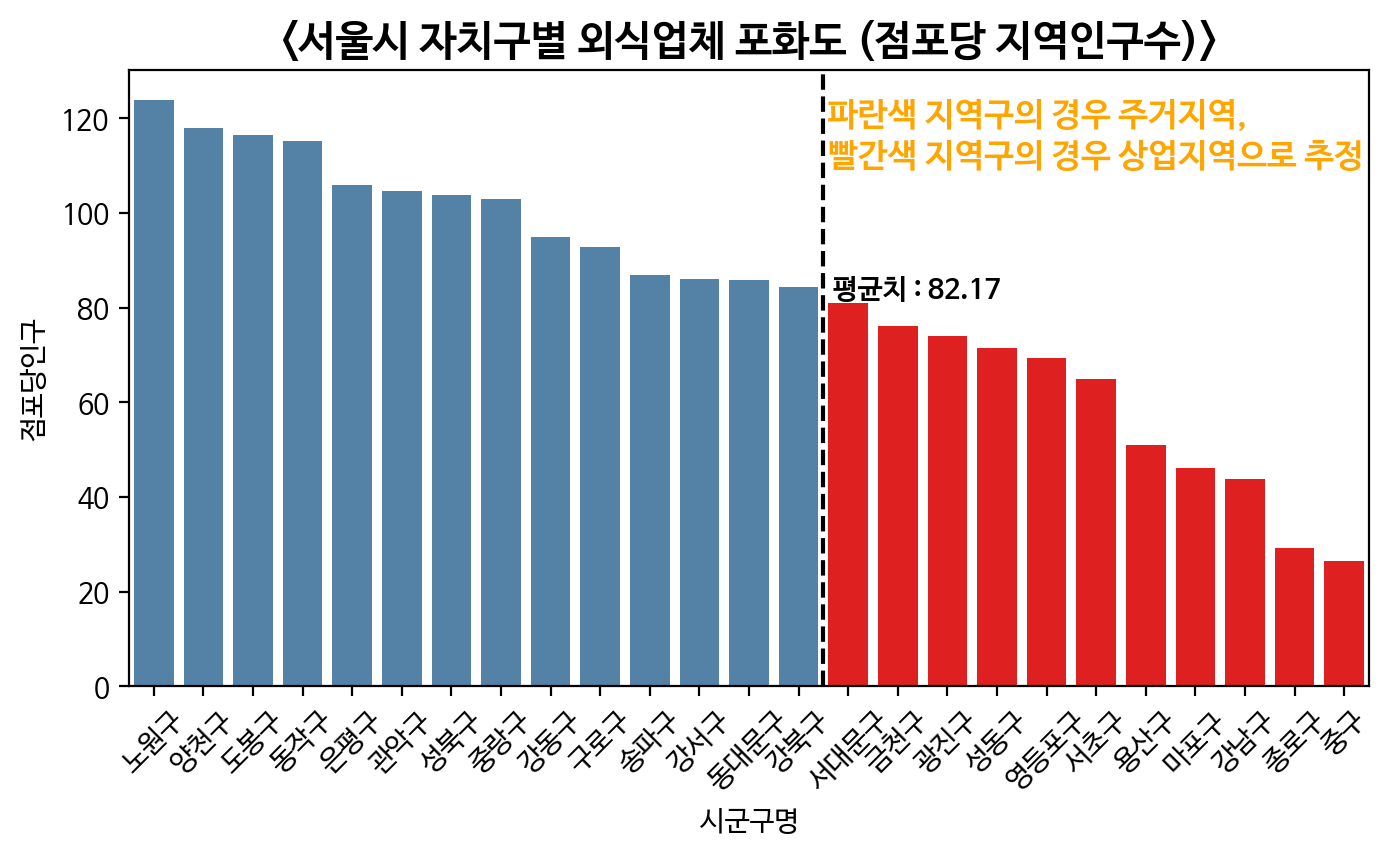

In [39]:
# 점포당 인구 기준 내림차순 정렬
sigungu_over = sigungu_food_pop.sort_values(by = '점포당인구', ascending = False)
plt.figure(figsize = (8,4))

# 자치구별 점포당 인구수 평균치를 기준으로 색깔 구분
mean_val = np.mean(sigungu_over['점포당인구'])
cols = ['red' if (pop < mean_val) else 'steelblue' for pop in sigungu_over['점포당인구']]

# 바 그래프
sns.barplot(data = sigungu_over, x = '시군구명', y = '점포당인구', palette = cols)
plt.title("<서울시 자치구별 외식업체 포화도 (점포당 지역인구수)>", fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45)

# 데이터에 대한 해석 추가
plt.text(x = 13.6, y = 110, s = '파란색 지역구의 경우 주거지역,\n빨간색 지역구의 경우 상업지역으로 추정',
         fontdict = {'fontsize':12, 'fontweight':'semibold', 'color':'orange'} )

# 평균치 선 표시
plt.axvline(x = 13.5, ls = '--', c = 'black')
plt.text(x = 13.7, y = 82, s = f'평균치 : {np.round(mean_val, 2)}',
         fontdict = {'fontsize':10, 'fontweight':'semibold', 'color':'black'} )

plt.show()

## 2.3 서울시 업종별 외식업체 경쟁도(포화도) 분석

- 전처리 과정 :
    - 업종분류명 중 음식배달서비스, 부페, 기타음식업은 비중이 적고 창업 고려 대상에서 후순위에 있기 때문에 이상치로 제거

    - 시장 경쟁도(포화도)를 계산하기 위한 파생변수 생성
        - 업종당 인구수 =  전체 서울시 인구수 / 업종별 점포수



- 분석 및 시각화 과정 :

    - 1) 업종당 인구수 기준 내림차순 정렬

    - 2) 평균치를 기준으로 지역을 구분
        - 빨간색 지역 : 서울 전체 평균치보다 낮은 지역
        - 파란색 지역 : 서울 전체 평균치보다 높은 지역

    - 3) seaborn barplot을 통해 시각화

- 분석 결과 :
    - 업종별 외식업체 포화도 평균은 1234.24가 도출됨
    - 평균보다 높은 지역과 낮은 지역을 구분한 결과 경쟁강도와 업종 포화상태를 유추할 수 있음
    - 빨간색으로 표시된 업종은 인구수 대비 공급량이 많은 업종으로 레드오션 시장으로 해석할 수 있음
    - 파란색으로 표시된 업종은 인구수 대비 공급량이 상대적으로 적은 업종으로 블루오션 시장으로 해석될 수 있음

In [40]:
# 업종 중 음식배달서비스, 부페, 기타음식업은 drop
sector_pop = sigungu_small_count[~sigungu_small_count['상권업종중분류명'].isin(["음식배달서비스", "부페", "기타음식업", '별식/퓨전요리'])]

In [41]:
# 서울시 총 인구수 계산
seoul_sum = seoul_pop['계 (명)'].sum()
seoul_sum

9668008.0

In [42]:
# 새로운 파생변수 '업종당인구수' 생성
sector_pop['업종당인구수'] = seoul_sum / sector_pop['점포수']
sector_pop.head(3)

,상권업종중분류명,점포수,업종당인구수
0,한식,41045,235.546546
1,커피점/카페,21620,447.178908
2,유흥주점,12049,802.390904


In [43]:
sector_pop['업종당인구수'].describe()

count      10.000000
mean     1234.238747
std       666.749258
min       235.546546
25%       841.384970
50%      1219.746133
75%      1655.934076
max      2484.071942
Name: 업종당인구수, dtype: float64

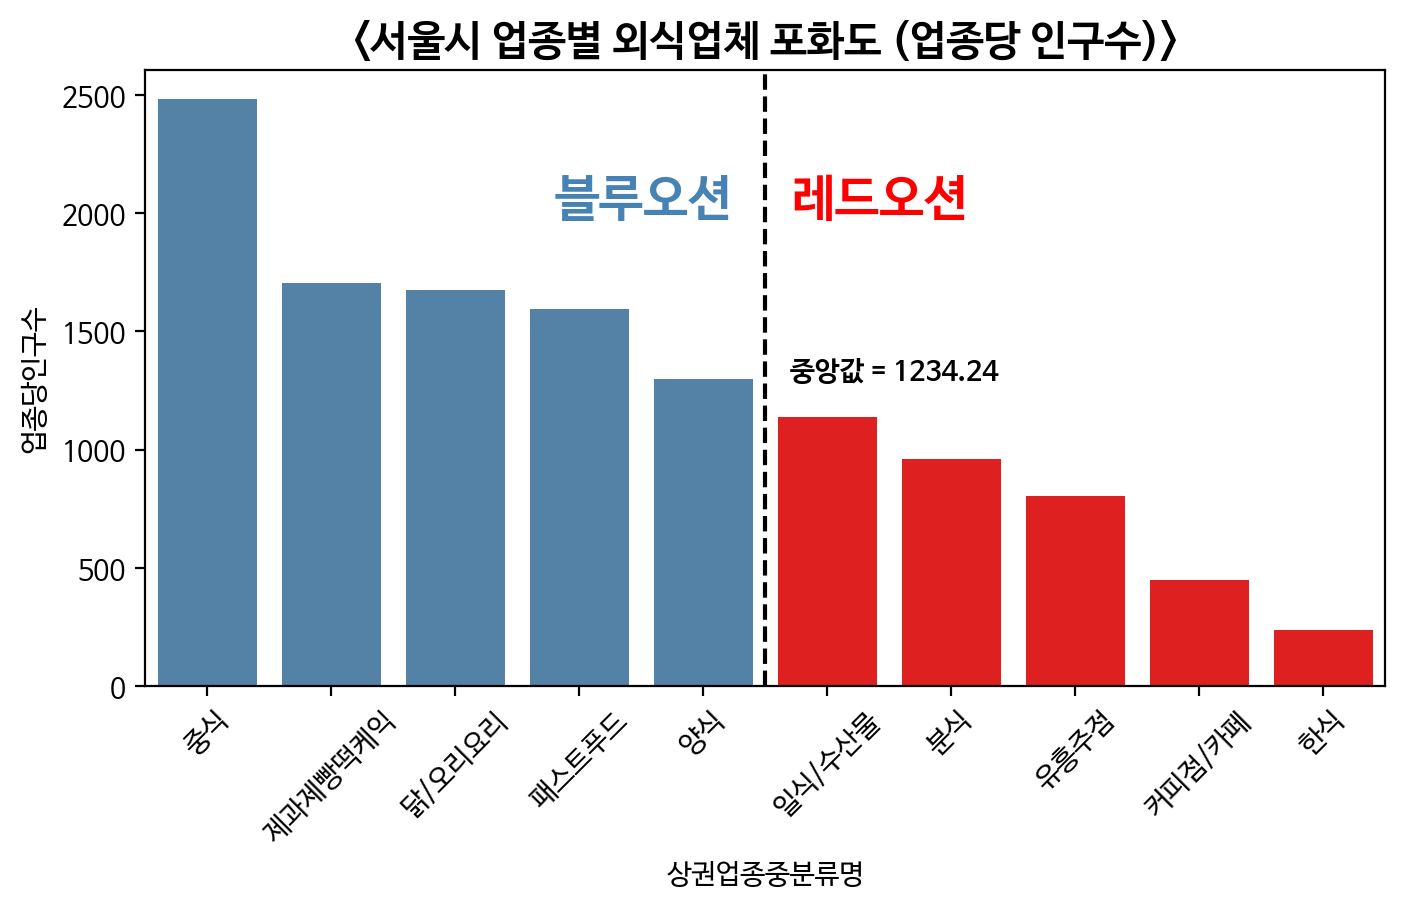

In [44]:
# 업종당인구수 기준 내림차순 정렬
sigungu_per = sector_pop.sort_values(by = '업종당인구수', ascending = False)


plt.figure(figsize = (8,4))

# 평균이 아닌 중앙값을 기준으로 구분
mean_val = np.mean(sigungu_per['업종당인구수'])
cols = ['red' if (pop < mean_val) else 'steelblue' for pop in sigungu_per['업종당인구수']]

# 바그래프
sns.barplot(data = sigungu_per, x = '상권업종중분류명', y = '업종당인구수', palette = cols)
plt.title("<서울시 업종별 외식업체 포화도 (업종당 인구수)>", fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.text(x = 2.8, y = 2000, s = '블루오션',
         fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'steelblue'} )

plt.text(x = 4.7, y = 2000, s = '레드오션',
         fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'red'} )

plt.axvline(x = 4.5, ls = '--', c = 'black')

plt.text(x = 4.7, y = 1300, s = f'중앙값 = {np.round(mean_val, 2)}',
         fontdict = {'fontsize':10, 'fontweight':'semibold', 'color':'black'} )

plt.show()

# 3.폐업율 데이터
- 사용 데이터 : 서울시 상권분석서비스(자치구별 상권변화지표)
	- 시점 : 2022년 4분기 기준
	- 지역 : 서울시 자치구별, 업종별
	- 항목(컬럼) : 업종분류명, 행정구역명, 평균영업개월수, 점포수, 개업률, 폐업률, 3년 생존율
	- 데이터수집 방법 : 웹스크래핑
	- 출처 : https://scpm.seoul.go.kr/trdar/trdarMain?signguCd=11140&svcIndutyCd=CS100008

## 3.1 업종별 레이더 차트 시각화

In [45]:
# 데이터 로드
close_df = pd.read_csv('/content/drive/MyDrive/eda프로젝트/업종별폐업률.csv')

In [46]:
# 상위값 확인
# 업종별로 확인하기 위해 그룹화 및 집계가 필요함
close_df.head()

,업종분류명,행정구역명,평균영업개월수(개월),점포수(개),개업률(%),폐업률(%),3년생존율(%)
0,한식음식점,종로구,37.7,"2,403",2.8,3.2,62.0
1,한식음식점,중구,37.3,"2,364",2.8,2.2,59.3
2,한식음식점,용산구,36.5,"1,487",3.1,2.6,55.0
3,한식음식점,성동구,34.7,"1,539",3.3,3.4,55.2
4,한식음식점,광진구,32.9,"1,731",3.7,4.1,49.0


In [47]:
# 집계를 하기 위해 문자열로 되어 있는 점포수(개) 필드를 정수형으로 변환
close_df['점포수(개)'] = close_df['점포수(개)'].str.replace(',', '').astype(int)

In [48]:
# 업종분류명을 기준으로 그룹화하여 평균을 집계
# 단, 개업률, 폐업률, 3년생존율 필드는 비율로 되어 있기 때문에 기하평균 적용
from scipy import stats
type_gp = close_df.groupby(['업종분류명']).agg({'평균영업개월수(개월)' : np.mean,
                                 '점포수(개)' : np.mean,
                                 '개업률(%)': stats.gmean,
                                 '폐업률(%)' : stats.gmean,
                                 '3년생존율(%)' : stats.gmean}).reset_index()

In [49]:
type_gp.head(2)

,업종분류명,평균영업개월수(개월),점포수(개),개업률(%),폐업률(%),3년생존율(%)
0,분식전문점,27.648,693.36,4.223876,4.202785,46.466982
1,양식음식점,31.368,283.88,4.981521,3.347049,51.143533


In [50]:
# 각각 스케일이 다른 값들을 정규화하기 위해 min-max scaling 작업 진행
type_gp_norm = type_gp.copy()
for col in type_gp_norm.columns[1:]:
    type_gp_norm[col] = type_gp_norm[col].apply(lambda x : (x - np.min(type_gp_norm[col])) / (np.max(type_gp_norm[col]) - np.min(type_gp_norm[col])))

In [51]:
type_gp_norm.head(2)

,업종분류명,평균영업개월수(개월),점포수(개),개업률(%),폐업률(%),3년생존율(%)
0,분식전문점,0.000000,0.315940,0.692191,0.784789,0.285294
1,양식음식점,0.422727,0.099064,0.906368,0.362814,0.639481


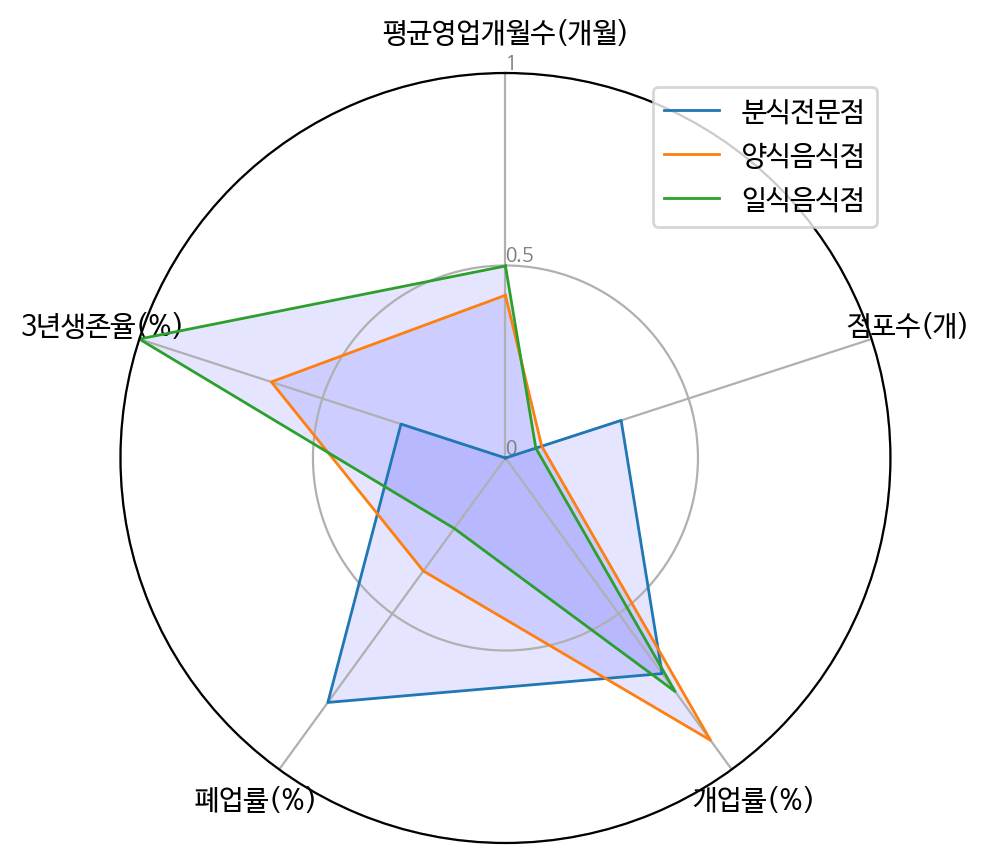

In [52]:
# Libraries
from math import pi

# number of variable
categories=list(type_gp_norm)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize = (5,5))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.5,1], ["0","0.5","1"], color="grey", size=7)
plt.ylim(0,1)

# Ind1
for i in range(3):
    values=type_gp_norm.loc[i].drop('업종분류명').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=type_gp_norm['업종분류명'][i])
    ax.fill(angles, values, 'b', alpha=0.1)


# values=type_gp_norm.loc[0].drop('업종분류명').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label=type_gp_norm['업종분류명'][0])
# ax.fill(angles, values, 'b', alpha=0.1)

# # Ind2
# values=type_gp_norm.loc[1].drop('업종분류명').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label=type_gp_norm['업종분류명'][1])
# ax.fill(angles, values, 'r', alpha=0.1)

# values=type_gp_norm.loc[2].drop('업종분류명').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label=type_gp_norm['업종분류명'][2])
# ax.fill(angles, values, 'g', alpha=0.1)

# Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.legend(loc='upper right')
# Show the graph
plt.show()

In [53]:
# 컬럼 순서 재정렬
type_gp = type_gp[['업종분류명', '점포수(개)', '개업률(%)', '폐업률(%)', '평균영업개월수(개월)', '3년생존율(%)']]
# 전체 값들을 소수 2째자리로 반올림
type_gp = round(type_gp, 2)

## 3.2 업종별 폐업률, 평균영업개월수, 생존율 분석

- 전처리 과정 :
    - 업종별 폐업률, 개업률 등 지표를 비교하기 위해 업종분류명으로 그룹화하여 평균으로 집계
    - 레이다 차트로 시각화하기 위해 각 컬럼별로 정규화(min-max scaling) 작업 진행
        - **각 feature에 대한 업종 간 상대적인 거리를 유지하기 위해서 표준화가 아닌 최소-최대 정규화를 선택**

- 분석 및 시각화 과정 :

    - 1) 5개의 feature들에 대한 레이다 차트를 업종별로 비교할 수 있도록 시각화
        - 일종의 스탯 표현 방식

    - 2) 수치들을 테이블 형태로 비교하기 위해 pandas의 데이터프레임으로 변환하고, gradient 색상을 부여하여 시각적 정리
        - 테이블 집계 시 3년 생존율 기준으로 내림차순 정렬

- 분석 결과 :
    - 표 정리 :
        - 점포수 기준으로 한식음식점이 가장 많고, 커피-음료, 분식전문점 순으로 이어짐
        - 이는 앞서 1.3의 외식업 업종별 비중에서 분석한 내용과 비슷한 양상을 보임
        - 개업률 기준으로 커피-음료 업이 가장 높으며, 양식음식점, 중식음식점, 일식음식점, 분식전문점 순으로 이어짐
        - 호프-간이주점의 개업률이 1.78%로 가장 낮음
        - 폐업률 기준 치킨전문점이 4.64%로 가장 높고 분식, 커피-음료, 중식 순으로 이어짐
        - 평균영업개월수는 호프-간이주점이 가장 길며, 분식전문점이 가장 낮음
        - 3년생존율 기준 일식과 제과점이 가장 높고 치킨전문점이 가장 낮음
    - 해석 :
        - 전체적으로 일식음식점과 제과점이 생존율과 평균 영업개월수가 높은 편으로 안전한 업종에 속한다고 해석될 수 있음
        - 반대로 분식점과 치킨전문점은 높은 폐업률과 낮은 생존율로 위험성이 높은 업종으로 분류될 수 있음

In [54]:
# 업종별 개업률, 폐업률, 평균영업개월수, 3년생존율 비교
type_gp.sort_values(by = ['3년생존율(%)'], ascending = False).style.background_gradient()

,업종분류명,점포수(개),개업률(%),폐업률(%),평균영업개월수(개월),3년생존율(%)
2,일식음식점,253.480000,4.430000,3.070000,32.040000,55.900000
3,제과점,167.360000,3.340000,2.630000,34.860000,55.860000
6,커피-음료,777.720000,5.310000,3.870000,31.680000,53.030000
8,한식음식점,1984.920000,3.250000,3.510000,33.450000,51.170000
1,양식음식점,283.880000,4.980000,3.350000,31.370000,51.140000
7,패스트푸드점,120.440000,3.060000,3.160000,34.530000,50.340000
4,중식음식점,226.640000,4.640000,3.700000,31.950000,48.750000
9,호프-간이주점,446.360000,1.780000,2.610000,36.450000,47.440000
0,분식전문점,693.360000,4.220000,4.200000,27.650000,46.470000
5,치킨전문점,96.840000,3.170000,4.640000,31.640000,42.700000


## 3.3 자치구별 폐업률, 평균영업개월수, 생존율 분석

- 전처리 과정 :
    - 자치구별 폐업률, 개업률 등 지표를 비교하기 위해 자치구명으로 그룹화하여 평균으로 집계

- 분석 및 시각화 과정 :

    - 수치들을 테이블 형태로 비교하기 위해 pandas의 데이터프레임으로 변환하고, gradient 색상을 부여하여 시각적 정리
    - 테이블 집계 시 3년 생존율 기준으로 내림차순 정렬

- 분석 결과 :
    - 표 정리 :
        - 3년 생존율 기준 중구가 57.744%로 가장 높고, 성북구, 성동구, 강북구 순으로 이어짐
        - 평균영업개월수 기준으로는 종로구가 가장 높으며 중구, 서초구, 용산구 순으로 이어짐
        - 폐업률은 강북구와 송파구가 높은 편에 속하고 중구, 용산구, 서초구는 낮은 편에 속함
        
    - 해석 :
        - 앞서, 분석에서 서울시 자치구별 경쟁도를 비교한 결과 상업지역에 해당하는 중구, 종로구가 레드오션으로 해석이 되었는데 폐업률을 고려하였을 때 점포수가 많은 것에 비해 생존율은 높은 편임

        - 따라서, 앞서 경쟁도(포화도)만을 가지고 시장을 평가하기에는 부적절할 것으로 보이고, 폐업률과 같은 안정도 지표를 고려하여 지역을 선정하는 작업이 필요할 것으로 보임
        
        - 비슷한 맥락으로 앞서 분석에서 강동구, 은평구, 중랑구 등의 지역은 블루오션 지역으로 평가되었으나, 실제 영업 안정도를 평가했을 때는 불안정한 지역으로 평가됨

        - 강남, 종로, 홍대와 같은 주요 상권에 비해서는 경쟁 강도가 낮을 수는 있으나, 실제로 영업 시에 위험성이 높을 것으로 예상됨

In [55]:
from scipy import stats
sigungu_gp = close_df.groupby(['행정구역명']).agg({'평균영업개월수(개월)' : np.mean,
                                 '점포수(개)' : np.mean,
                                 '개업률(%)': stats.gmean,
                                 '폐업률(%)' : stats.gmean,
                                 '3년생존율(%)' : stats.gmean}).reset_index()

In [56]:
sigungu_gp = sigungu_gp[['행정구역명', '점포수(개)', '개업률(%)', '폐업률(%)', '평균영업개월수(개월)', '3년생존율(%)']]
sigungu_gp.sort_values(by = ['3년생존율(%)'], ascending = False).style.background_gradient()

,행정구역명,점포수(개),개업률(%),폐업률(%),평균영업개월수(개월),3년생존율(%)
23,중구,565.500000,2.583228,2.448326,36.490000,57.744936
16,성북구,418.400000,3.258079,3.508693,33.620000,55.193242
15,성동구,391.800000,4.437244,3.601472,32.080000,53.054135
2,강북구,349.000000,3.620039,4.314912,30.040000,52.997117
14,서초구,652.600000,2.924344,2.751986,35.410000,52.546131
22,종로구,621.500000,3.416667,3.116918,36.630000,52.239980
9,도봉구,264.600000,4.058245,3.113361,32.060000,52.084706
18,양천구,344.700000,4.195011,3.039217,31.020000,51.794125
20,용산구,476.100000,3.526168,2.645416,35.030000,51.495734
7,금천구,311.500000,3.482746,3.478659,31.370000,51.229134


# 4.서울시 업종별 외식 시장 현황 분석

- **'시장 경쟁도(포화도)'**와 **'시장안정도'**를 기준으로 외식 업종별 시장 포지셔닝

- **시장 경쟁도(포화도)** :
    - 일반적으로 알려진 소매업종에 대한 포화지수는 아래와 같음
	     ```
         소매포화지수(IRS) = [지역시장의 총가구수x가구당 특정 업태에 대한 지출액] / 특정 업태에 대한 총매장면적
         ```

        - 하지만, 지출액, 매장면적에 대한 데이터를 구하기 어려운 상황이기에 포화도를 유추할 수 있는 임의의 산식을 활용

	- 정의 : 추정 수요량과 공급량 간의 비율을 통해 해당 업종이 과잉 경쟁 상태인지 확인할 수 있는 지표

	- 평가 지표 : 업종별 점포당 인구수
        - 서울시 전체 인구수 / 업종별 점포 수
        - ex) 120 => 인구 120명 당 1개 점포
		- 단, 주민등록인구 기준이기 때문에 실제 수요가 아닌 추정 수요로 볼 수 있음

	- 해석 :
        - 시장 포화도 지표가 낮을수록, 한 점포를 방문할 수 있는 사람이 적다는 의미로 경쟁도가 높은 상황(과잉 경쟁)으로 해석 가능,
	    - 반대로 시장 포화도 지표가 높을수록, 한 점포를 방문할 수 있는 사람이 많다는 의미이기 때문에 경쟁도가 낮은 상황으로 해석 가능

- **시장 안정도** :
	- 정의 : 창업 후 안정적으로 영업을 이어갈 수 있는지 확인할 수 있는 지표

	- 평가 지표 : 업종별 시장 안정도
        - 안정도 = (개업률 * 3년 생존율) / 폐업률

	- 해석 :
        - 시장 안정도가 높은 업종은 창업 후 비교적 안정적으로 영업을 이어나갈 수 있어 손익분기점을 넘길 가능성이 높다는 것을 의미
        - 반대로 시장 안정도가 낮은 업종은 창업 후 투자금 회수를 못할 위험성이 높다는 것을 의미
        - 업종 선택 시에 위험성을 예측할 수 있는 지표로 사용 가능


## 4.1 파생변수 생성

In [57]:
# 여러 데이터에 혼재되어 있는 업중 분류명을 통일하기 위해 각 데이터의 업종명을 확인
print(sigungu_per['상권업종중분류명'].values)
print(type_gp['업종분류명'].values)

['중식' '제과제빵떡케익' '닭/오리요리' '패스트푸드' '양식' '일식/수산물' '분식' '유흥주점' '커피점/카페' '한식']
['분식전문점' '양식음식점' '일식음식점' '제과점' '중식음식점' '치킨전문점' '커피-음료' '패스트푸드점' '한식음식점'
 '호프-간이주점']


In [58]:
# 폐업률 데이터에서 각 변수 간의 상관관계를 확인
# 폐업률과 영업개월수, 폐업률과 생존율 간에는 음의 상관관계가 있음
# 하지만, 영업개월수와 생존율 간에는 큰 상관관계가 없는 것으로 보임
type_gp.corr()

,점포수(개),개업률(%),폐업률(%),평균영업개월수(개월),3년생존율(%)
점포수(개),1.000000,-0.029046,0.102997,-0.053963,0.071846
개업률(%),-0.029046,1.000000,0.363357,-0.675977,0.329097
폐업률(%),0.102997,0.363357,1.000000,-0.748488,-0.636870
평균영업개월수(개월),-0.053963,-0.675977,-0.748488,1.000000,0.254092
3년생존율(%),0.071846,0.329097,-0.636870,0.254092,1.000000


In [59]:
# 업종분류명 통일 작업
change_col_name = {'분식' : '분식전문점',
                    '양식' : '양식전문점',
                    '일식/수산물' : '일식음식점',
                    '제과제빵떡케익' : '제과점',
                    '중식' : '중식음식점',
                    '닭/오리요리' : '치킨전문점',
                    '커피점/카페' : '커피-음료',
                    '패스트푸드' : '패스트푸드점',
                    '한식' : '한식음식점',
                    '유흥주점' : '호프-간이주점'}
sigungu_per['상권업종중분류명'] = sigungu_per['상권업종중분류명'].map(change_col_name)
sigungu_per.rename(columns = {'상권업종중분류명':'업종분류명'}, inplace = True)

In [60]:
display(sigungu_per.head())
type_gp.head()

,업종분류명,점포수,업종당인구수
9,중식음식점,3892,2484.071942
8,제과점,5676,1703.313601
7,치킨전문점,5769,1675.855088
6,패스트푸드점,6057,1596.171042
5,양식전문점,7435,1300.337323


,업종분류명,점포수(개),개업률(%),폐업률(%),평균영업개월수(개월),3년생존율(%)
0,분식전문점,693.36,4.22,4.20,27.65,46.47
1,양식음식점,283.88,4.98,3.35,31.37,51.14
2,일식음식점,253.48,4.43,3.07,32.04,55.90
3,제과점,167.36,3.34,2.63,34.86,55.86
4,중식음식점,226.64,4.64,3.70,31.95,48.75


In [61]:
# 시장경쟁도 데이터와 폐업률 데이터를 결합
type_df_final = sigungu_per.merge(type_gp, how = 'inner', on = '업종분류명')
# 앞서 정의한 시장안정도 산식에 따라 파생변수 생성
type_df_final['시장안정수치'] =  (type_df_final['개업률(%)'] * type_df_final['3년생존율(%)']) / type_df_final['폐업률(%)']

In [62]:
# 각 지표에 대한 평균값 도출
mean_sat = type_df_final['업종당인구수'].mean()
mean_stab = type_df_final['시장안정수치'].mean()

# 평균값을 기준으로 세그먼트를 분류
def saturation_segmentation(saturation, mean_sat):
    return "공급 안정" if saturation > mean_sat else "과잉 공급"

def stability_segmentation(stability, mean_stab):
    return "시장 안정" if stability > mean_stab else "시장 불안정"

type_df_final["시장포화도"] = type_df_final["업종당인구수"].apply(lambda x: saturation_segmentation(x,mean_sat))
type_df_final["시장안정도"] = type_df_final["시장안정수치"].apply(lambda x: stability_segmentation(x, mean_stab))
type_df_final["업종포지셔닝"] = type_df_final["시장포화도"] + ' & ' + type_df_final["시장안정도"]

In [63]:
type_df_final.head()

,업종분류명,점포수,업종당인구수,점포수(개),개업률(%),폐업률(%),평균영업개월수(개월),3년생존율(%),시장안정수치,시장포화도,시장안정도,업종포지셔닝
0,중식음식점,3892,2484.071942,226.64,4.64,3.70,31.95,48.75,61.135135,공급 안정,시장 안정,공급 안정 & 시장 안정
1,제과점,5676,1703.313601,167.36,3.34,2.63,34.86,55.86,70.940076,공급 안정,시장 안정,공급 안정 & 시장 안정
2,치킨전문점,5769,1675.855088,96.84,3.17,4.64,31.64,42.70,29.172198,공급 안정,시장 불안정,공급 안정 & 시장 불안정
3,패스트푸드점,6057,1596.171042,120.44,3.06,3.16,34.53,50.34,48.746962,공급 안정,시장 불안정,공급 안정 & 시장 불안정
4,일식음식점,8487,1139.154943,253.48,4.43,3.07,32.04,55.90,80.663518,과잉 공급,시장 안정,과잉 공급 & 시장 안정


## 4.2 시각화 및 결과 분석

- 외식업종 9개를 포지셔닝한 결과 4개의 유형으로 분류될 수 있음
    - 공급 안정 & 시장 안정 : 제과점, 중식음식점 -> 1순위
    - 과잉 공급 & 시장 안정 : 일식음식점, 커피-음료 -> 2순위
    - 공급 안정 & 시장 불안정 : 패스트푸드점, 치킨전문점 -> 3순위
    - 과잉 공급 & 시장 불안정 : 한식음식점, 분식전문점, 호프-간이주점 -> 4순위

- 4개의 세그먼트를 통해 우선순위 또는 창업시 안정성을 평가할 수 있음
    - 가령, 경쟁이 낮고 시장이 안정적인 제과점과 중식점을 우선적으로 고려할 수 있을 것임
    - 한식음식점, 커피-음료점과 같이 경쟁도가 높은 업종과 치킨전문점, 호프간이주점과 같이 안정성이 낮은 업종은 추가적인 전략을 수립 후 창업을 진행할 수 있음

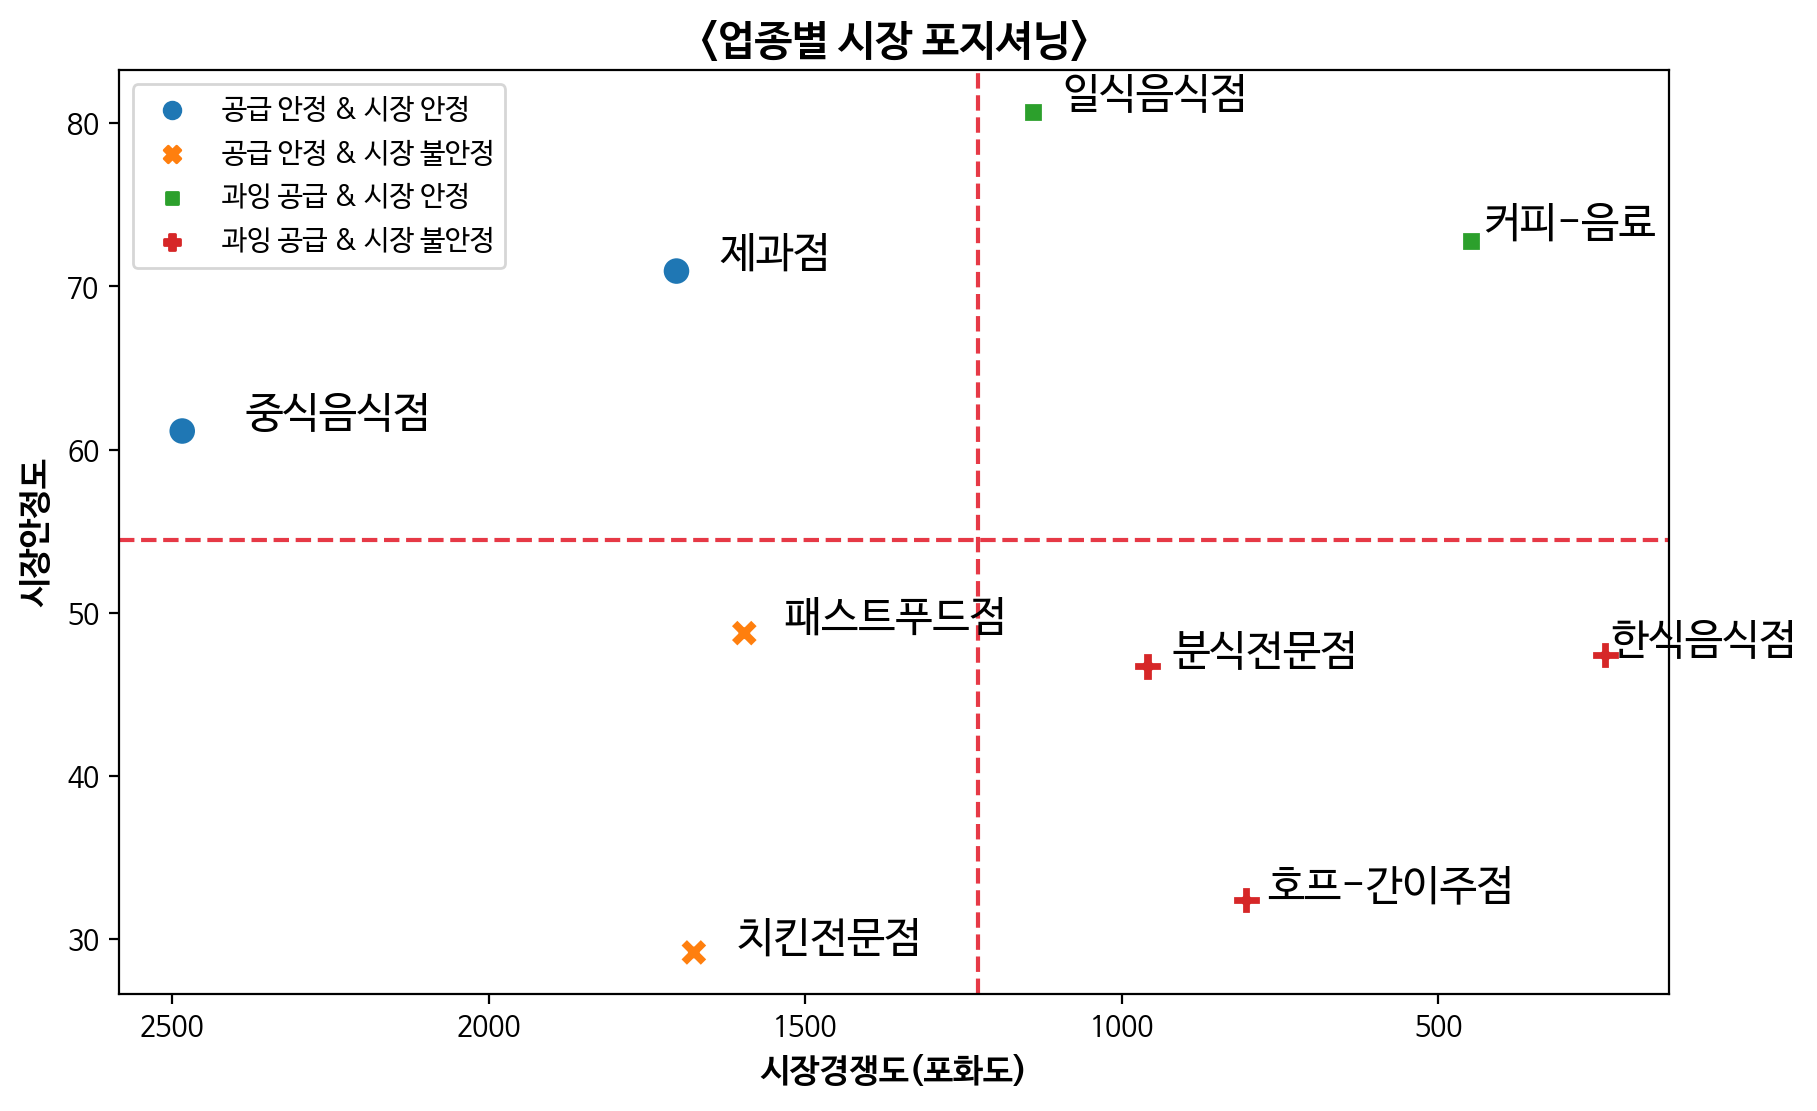

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = type_df_final,
                x = "업종당인구수",
                y = "시장안정수치",
                hue = "업종포지셔닝",
                style = "업종포지셔닝",
                s = 100)
plt.axhline(y=mean_stab, color="#e63946", lw = 1.5, ls = "--")
plt.axvline(x=mean_sat, color = "#e63946", lw = 1.5, ls = "--")

for n in range(len(type_df_final)):
    # text 함수에서 text(x축 좌표, y축 좌표, 문자열)을 입력하여, 좌표에 comment를 추가
    plt.text(type_df_final['업종당인구수'][n] * 0.96, type_df_final['시장안정수치'][n] * 1.005,
             type_df_final['업종분류명'][n], fontsize = 15)

plt.title("<업종별 시장 포지셔닝>", fontsize = 15, fontweight = "semibold")
plt.xlabel('시장경쟁도(포화도)',fontsize = 12, fontweight = "semibold" )
plt.ylabel('시장안정도',fontsize = 12, fontweight = "semibold" )
plt.xlim(max(type_df_final['업종당인구수']) + 100 , min(type_df_final['업종당인구수']) - 100)
plt.legend()
plt.show()

# 5.생활인구 데이터 로드
- 생활인구 정의 :
    - 생활인구란 통신데이터로 특정 시점에 개인이 위치한 지역을 집계한 ‘현주인구'를 의미

    - 시간대에 따라 변화하는 인구의 규모로 지역간 특성을 추측해 볼 수 있는 유용한 데이터

- 사용 데이터 : 행정동 단위 서울 생활인구(내국인)
	- 시점 : 2021년 상반기,하반기 / 2022년 상반기,하반기
	- 지역 : 서울시 행정동별
	- 항목(컬럼) : 기준일ID, 시간대구분, 행정동코드, 총생활인구수 등 33개 컬럼
	- 데이터수집 방법 : CSV 다운로드
	- 출처 : https://data.seoul.go.kr/dataList/OA-14991/S/1/datasetView.do#

## 5.1 데이터 전처리
- 불필요한 컬럼 제거

In [65]:
# 데이터 로드 시 오류가 발생하여 전체 컬럼 모두 가져올 수 있게 컬럼명 지정
col_list = ['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수',
            '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수',
            '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수',
            '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수',
            '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수',
            '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수',
            '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수',
            '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수',
            '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수',
            '여자65세부터69세생활인구수', '여자70세이상생활인구수']

In [66]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/eda프로젝트/생활인구/LOCAL_PEOPLE_DONG_202101.csv', usecols=col_list)

In [67]:
# 불필요한 컬럼 정의
drop_list = ['남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자65세부터69세생활인구수',
             '남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수',
             '여자65세부터69세생활인구수', '여자70세이상생활인구수']

In [68]:
# 불필요한 컬럼 제거
df_202101 = df.drop(drop_list, axis = 1).copy()

In [69]:
# 시간대별로 그룹화하여 생활인구 평균 집계
time_people = df_202101.groupby(['시간대구분']).mean().iloc[:, 2].reset_index()
time_people.head(4)

,시간대구분,총생활인구수
0,0,24015.946938
1,1,24007.802858
2,2,24003.419077
3,3,24004.005465


In [70]:
# 일별, 시간대별 평균 생활인구수를 확인할 수 있도록 피봇테이블 생성
pv_202101 = df_202101.pivot_table(index = '기준일ID', columns = '시간대구분', values = '총생활인구수', aggfunc = 'mean')

## 5.2 일별, 시간대별 평균생활인구수 히트맵 시각화


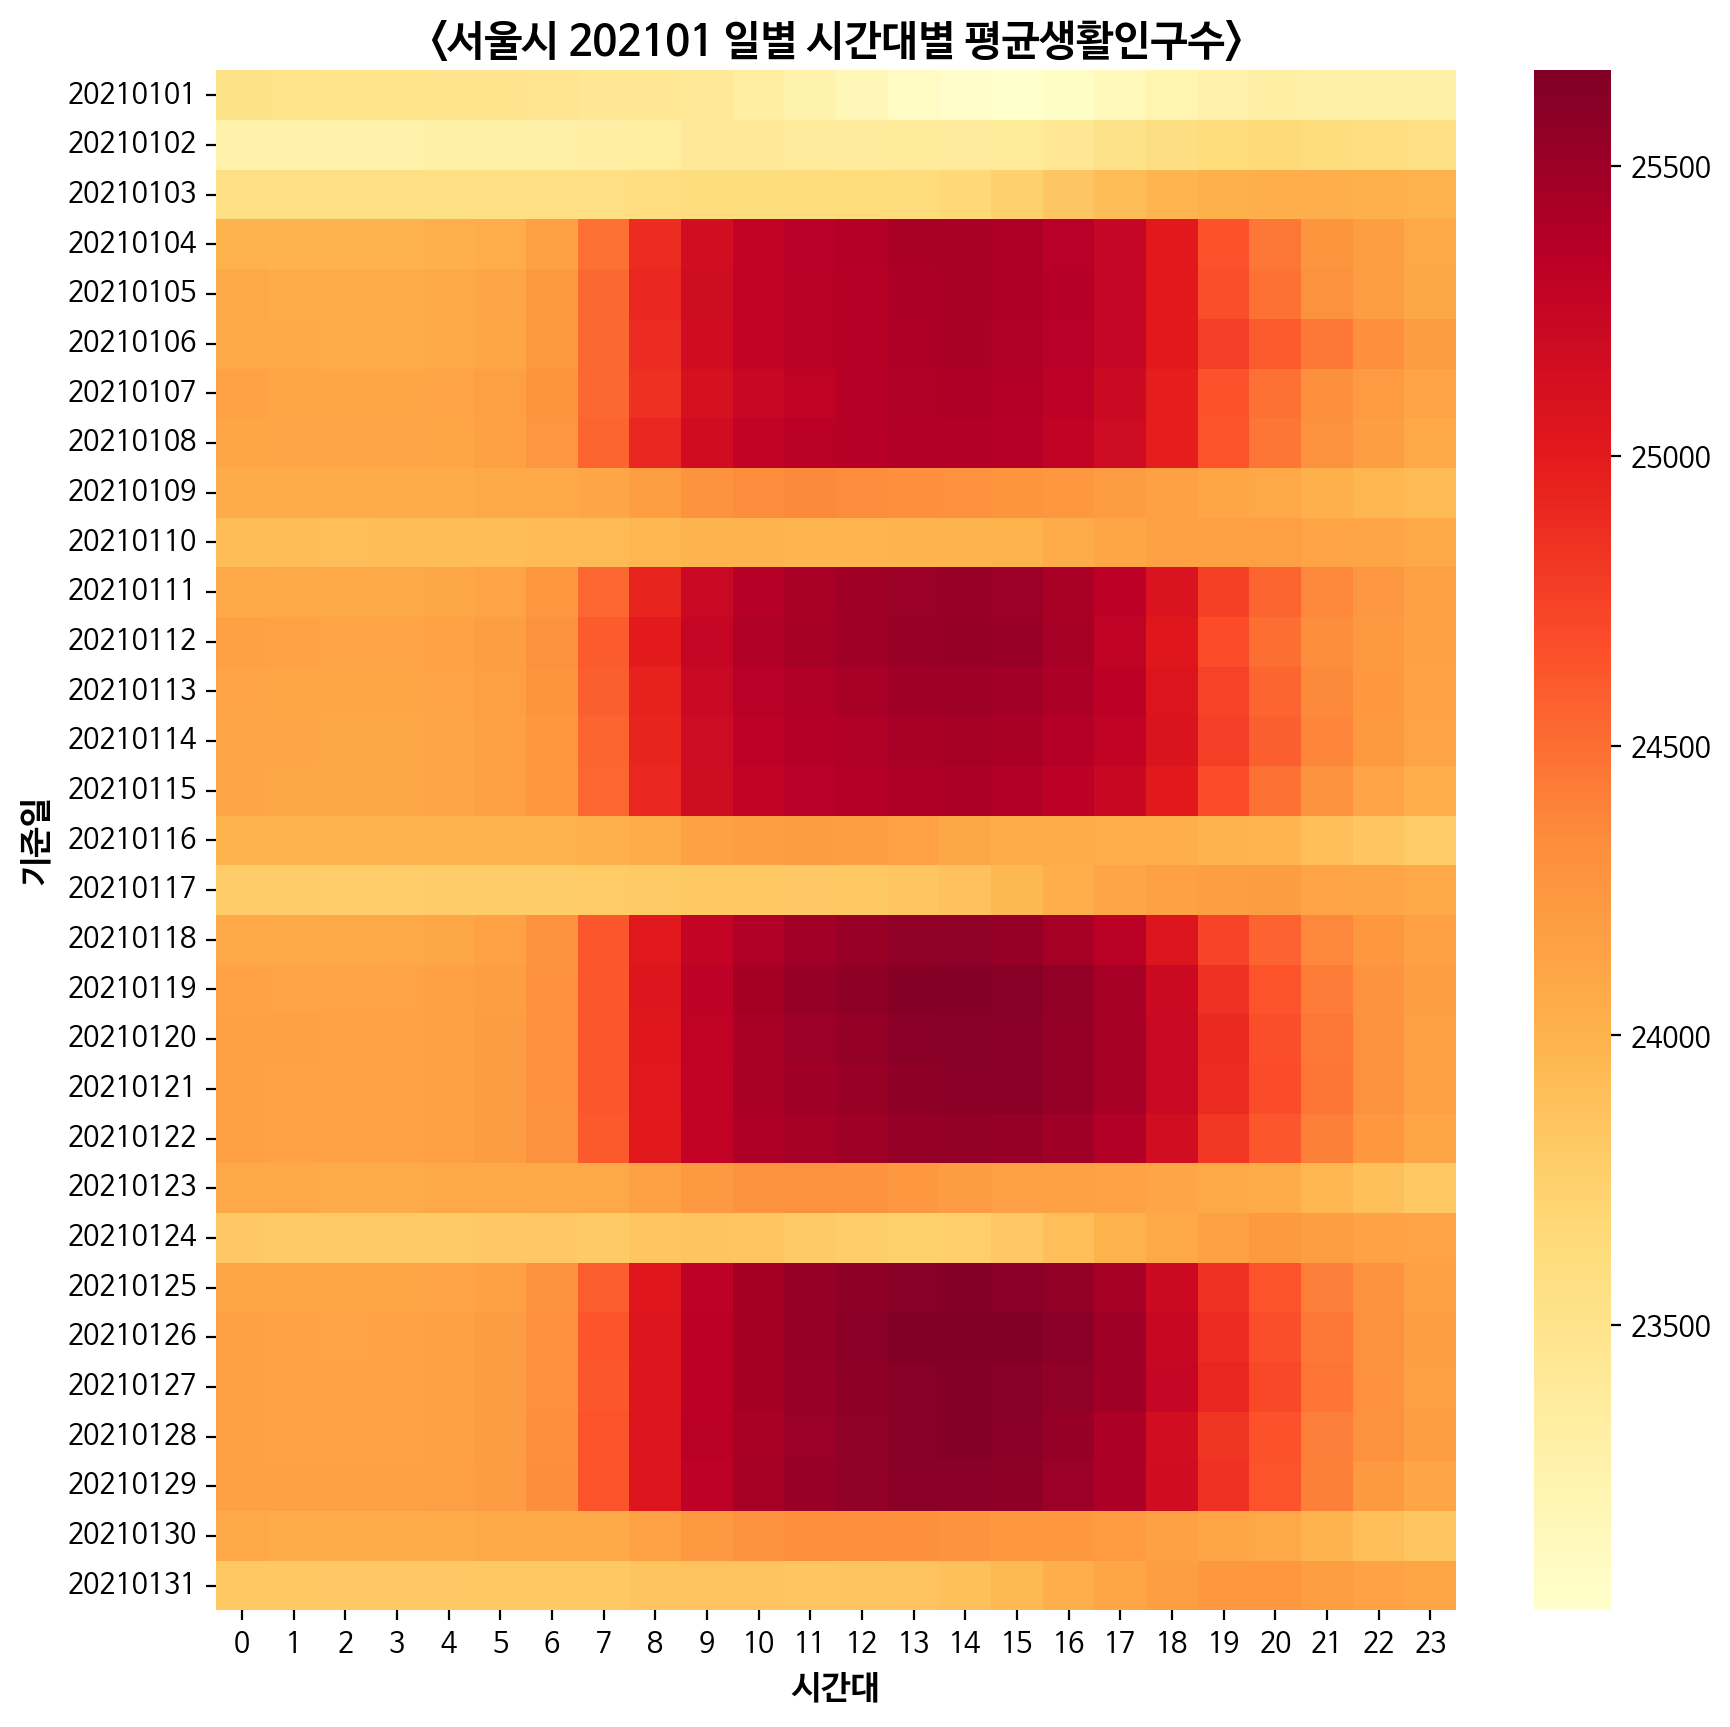

In [71]:
# 피봇테이블 결과를 히트맵으로 표현
plt.figure(figsize = (10,10))
sns.heatmap(pv_202101, cmap = 'YlOrRd')
plt.title("<서울시 202101 일별 시간대별 평균생활인구수>", fontsize = 15, fontweight = 'bold')
plt.xlabel('시간대', fontsize = 12, fontweight = 'semibold')
plt.ylabel('기준일', fontsize = 12, fontweight = 'semibold')
plt.show()

## 5.3 자치구별 생활인구수 추이

In [72]:
# 자치구 코드를 자치구명으로 매핑하기 위해서 자치구코드와 자치구명을 딕셔너리로 변환
gu_match = pd.read_excel("/content/drive/MyDrive/eda프로젝트/생활인구/행정동코드_매핑정보_20200325.xlsx", sheet_name = '유입지코드')
gu_match_dict = dict(gu_match[gu_match['RESD_DO_NM'] == '서울'].iloc[:,[0,2]].values)

In [73]:
# 자치구별 생활인구 데이터 로드
DIR_PATH = '/content/drive/MyDrive/eda프로젝트/생활인구/'
path_2021 = 'LOCAL_PEOPLE_GU_2021.csv'
path_2022 = 'LOCAL_PEOPLE_GU_2022.csv'
df_2021 = pd.read_csv(os.path.join(DIR_PATH, path_2021), encoding = 'cp949')
df_2022 = pd.read_csv(os.path.join(DIR_PATH, path_2022), encoding = 'cp949')

In [74]:
# 기준일에서 월, 일 데이터를 추출하고 자치구코드를 자치구명으로 매핑
df_2021["월"] = df_2021["기준일ID"].astype(str).str[-4:-2]
df_2021["일"] = df_2021["기준일ID"].astype(str).str[-2:]
df_2021['자치구코드'] = df_2021['자치구코드'].map(gu_match_dict)

df_2022["월"] = df_2022["기준일ID"].astype(str).str[-4:-2]
df_2022["일"] = df_2022["기준일ID"].astype(str).str[-2:]
df_2022['자치구코드'] = df_2022['자치구코드'].map(gu_match_dict)

In [75]:
# local_month_2021 = df_2021.pivot_table(index = '자치구코드', columns = '월', values = '총생활인구수', aggfunc = np.mean)
# local_month_2022 = df_2022.pivot_table(index = '자치구코드', columns = '월', values = '총생활인구수', aggfunc = np.mean)

In [76]:
# 월, 자치구 기준으로 그룹화하여 총생활인구의 평균치로 집계
# 집계된 결과를 생활인구2021, 생활인구2022
local_month_2021 = df_2021.groupby(['월', '자치구코드'])[['총생활인구수']].mean().reset_index().rename(columns = {'총생활인구수':'생활인구2021'})
local_month_2022 = df_2022.groupby(['월', '자치구코드'])[['총생활인구수']].mean().reset_index().rename(columns = {'총생활인구수':'생활인구2022'})

In [77]:
# 2021년 데이터와 2022년 데이터를 결합
compare_2122 = local_month_2021.merge(local_month_2022, how = 'inner', on = ['월', '자치구코드'])
# 2022년 생활인구와 2021년 생활인구 차이를 생활인구증감 파생변수로 추가
compare_2122['생활인구증감'] = ((compare_2122['생활인구2022'] - compare_2122['생활인구2021']) /  compare_2122['생활인구2021']) * 100

In [78]:
melt_2122 = compare_2122.groupby('자치구코드')[['생활인구2021', '생활인구2022']].mean().reset_index().melt(id_vars = '자치구코드')
melt_2122.rename(columns = {'variable':'구분',
                            'value':'총생활인구(평균)'}, inplace = True)

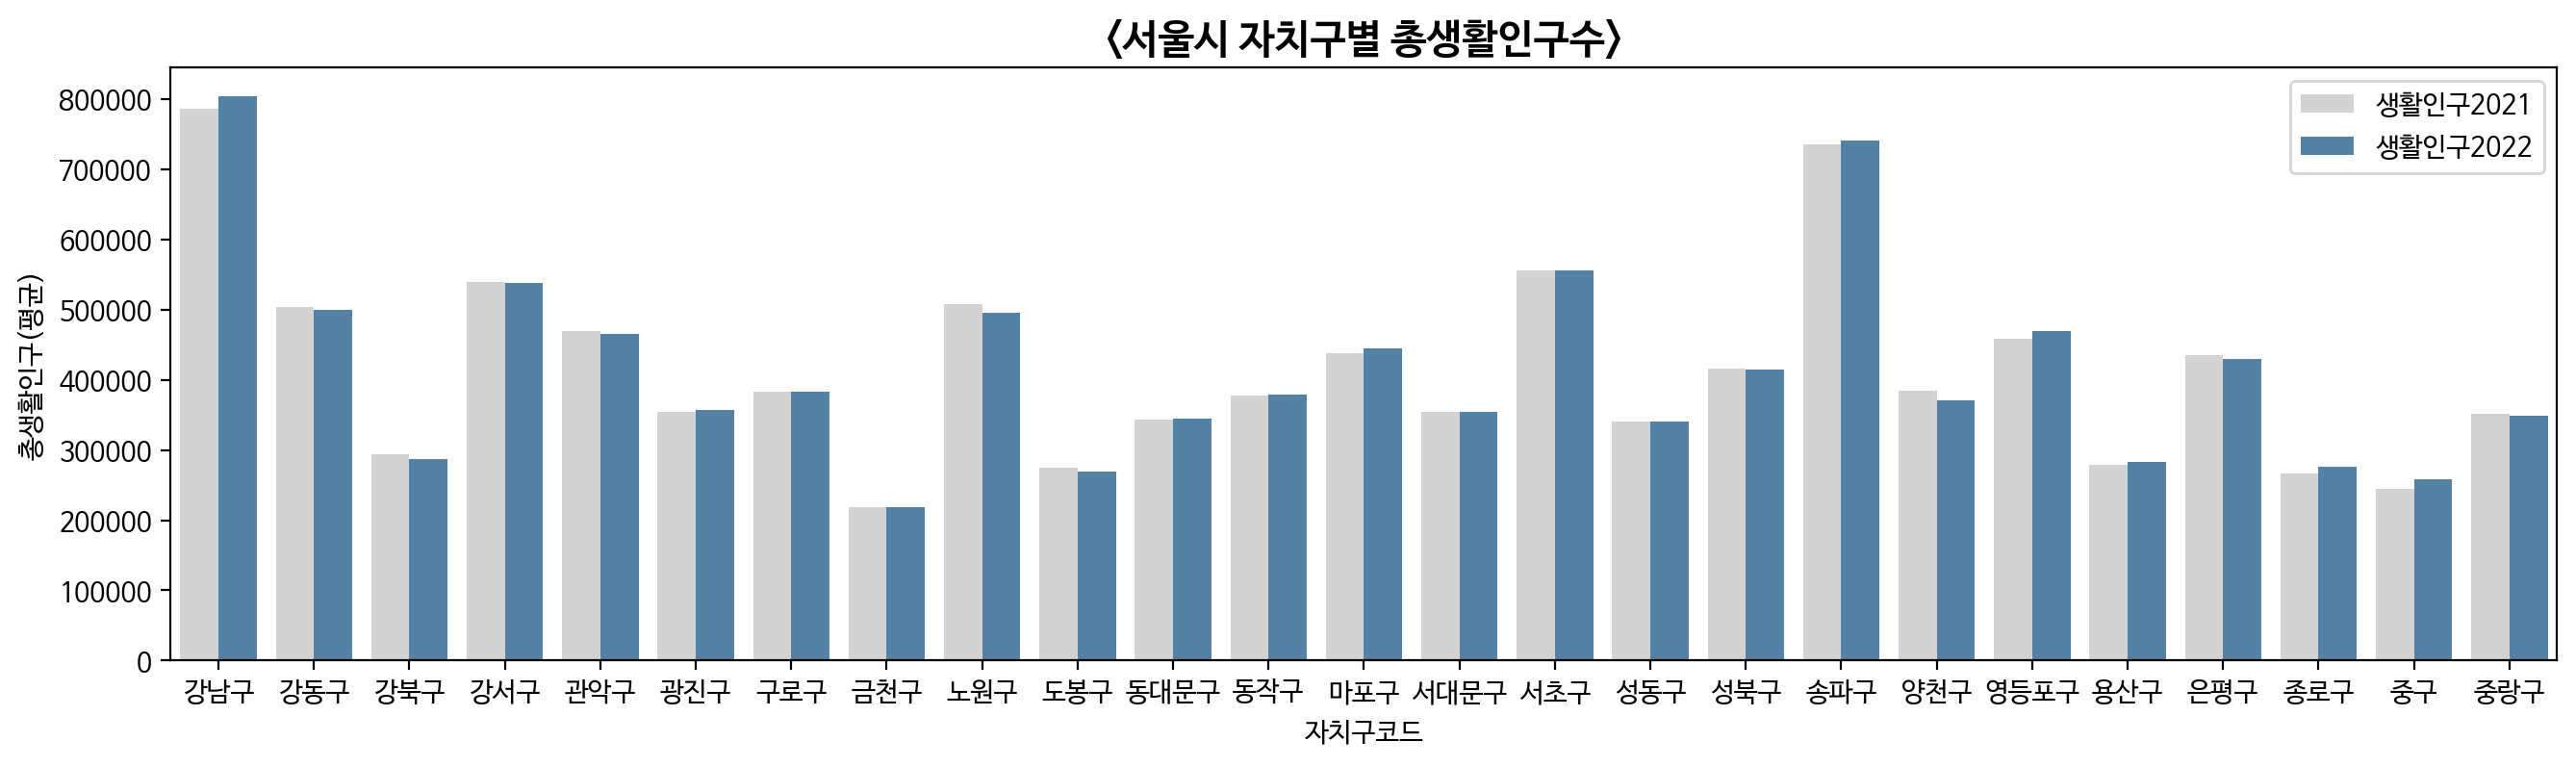

In [79]:
# 자치구별 총생활인구수 2021년 2022년 비교 그래프
plt.figure(figsize = (16,4))
sns.barplot(data = melt_2122, x = '자치구코드', y = '총생활인구(평균)', hue = '구분', palette=['lightgrey', 'steelblue'] )
plt.title("<서울시 자치구별 총생활인구수>", fontsize = 15, fontweight = 'bold')
plt.legend()
# plt.xticks(rotation = 45)
plt.show()

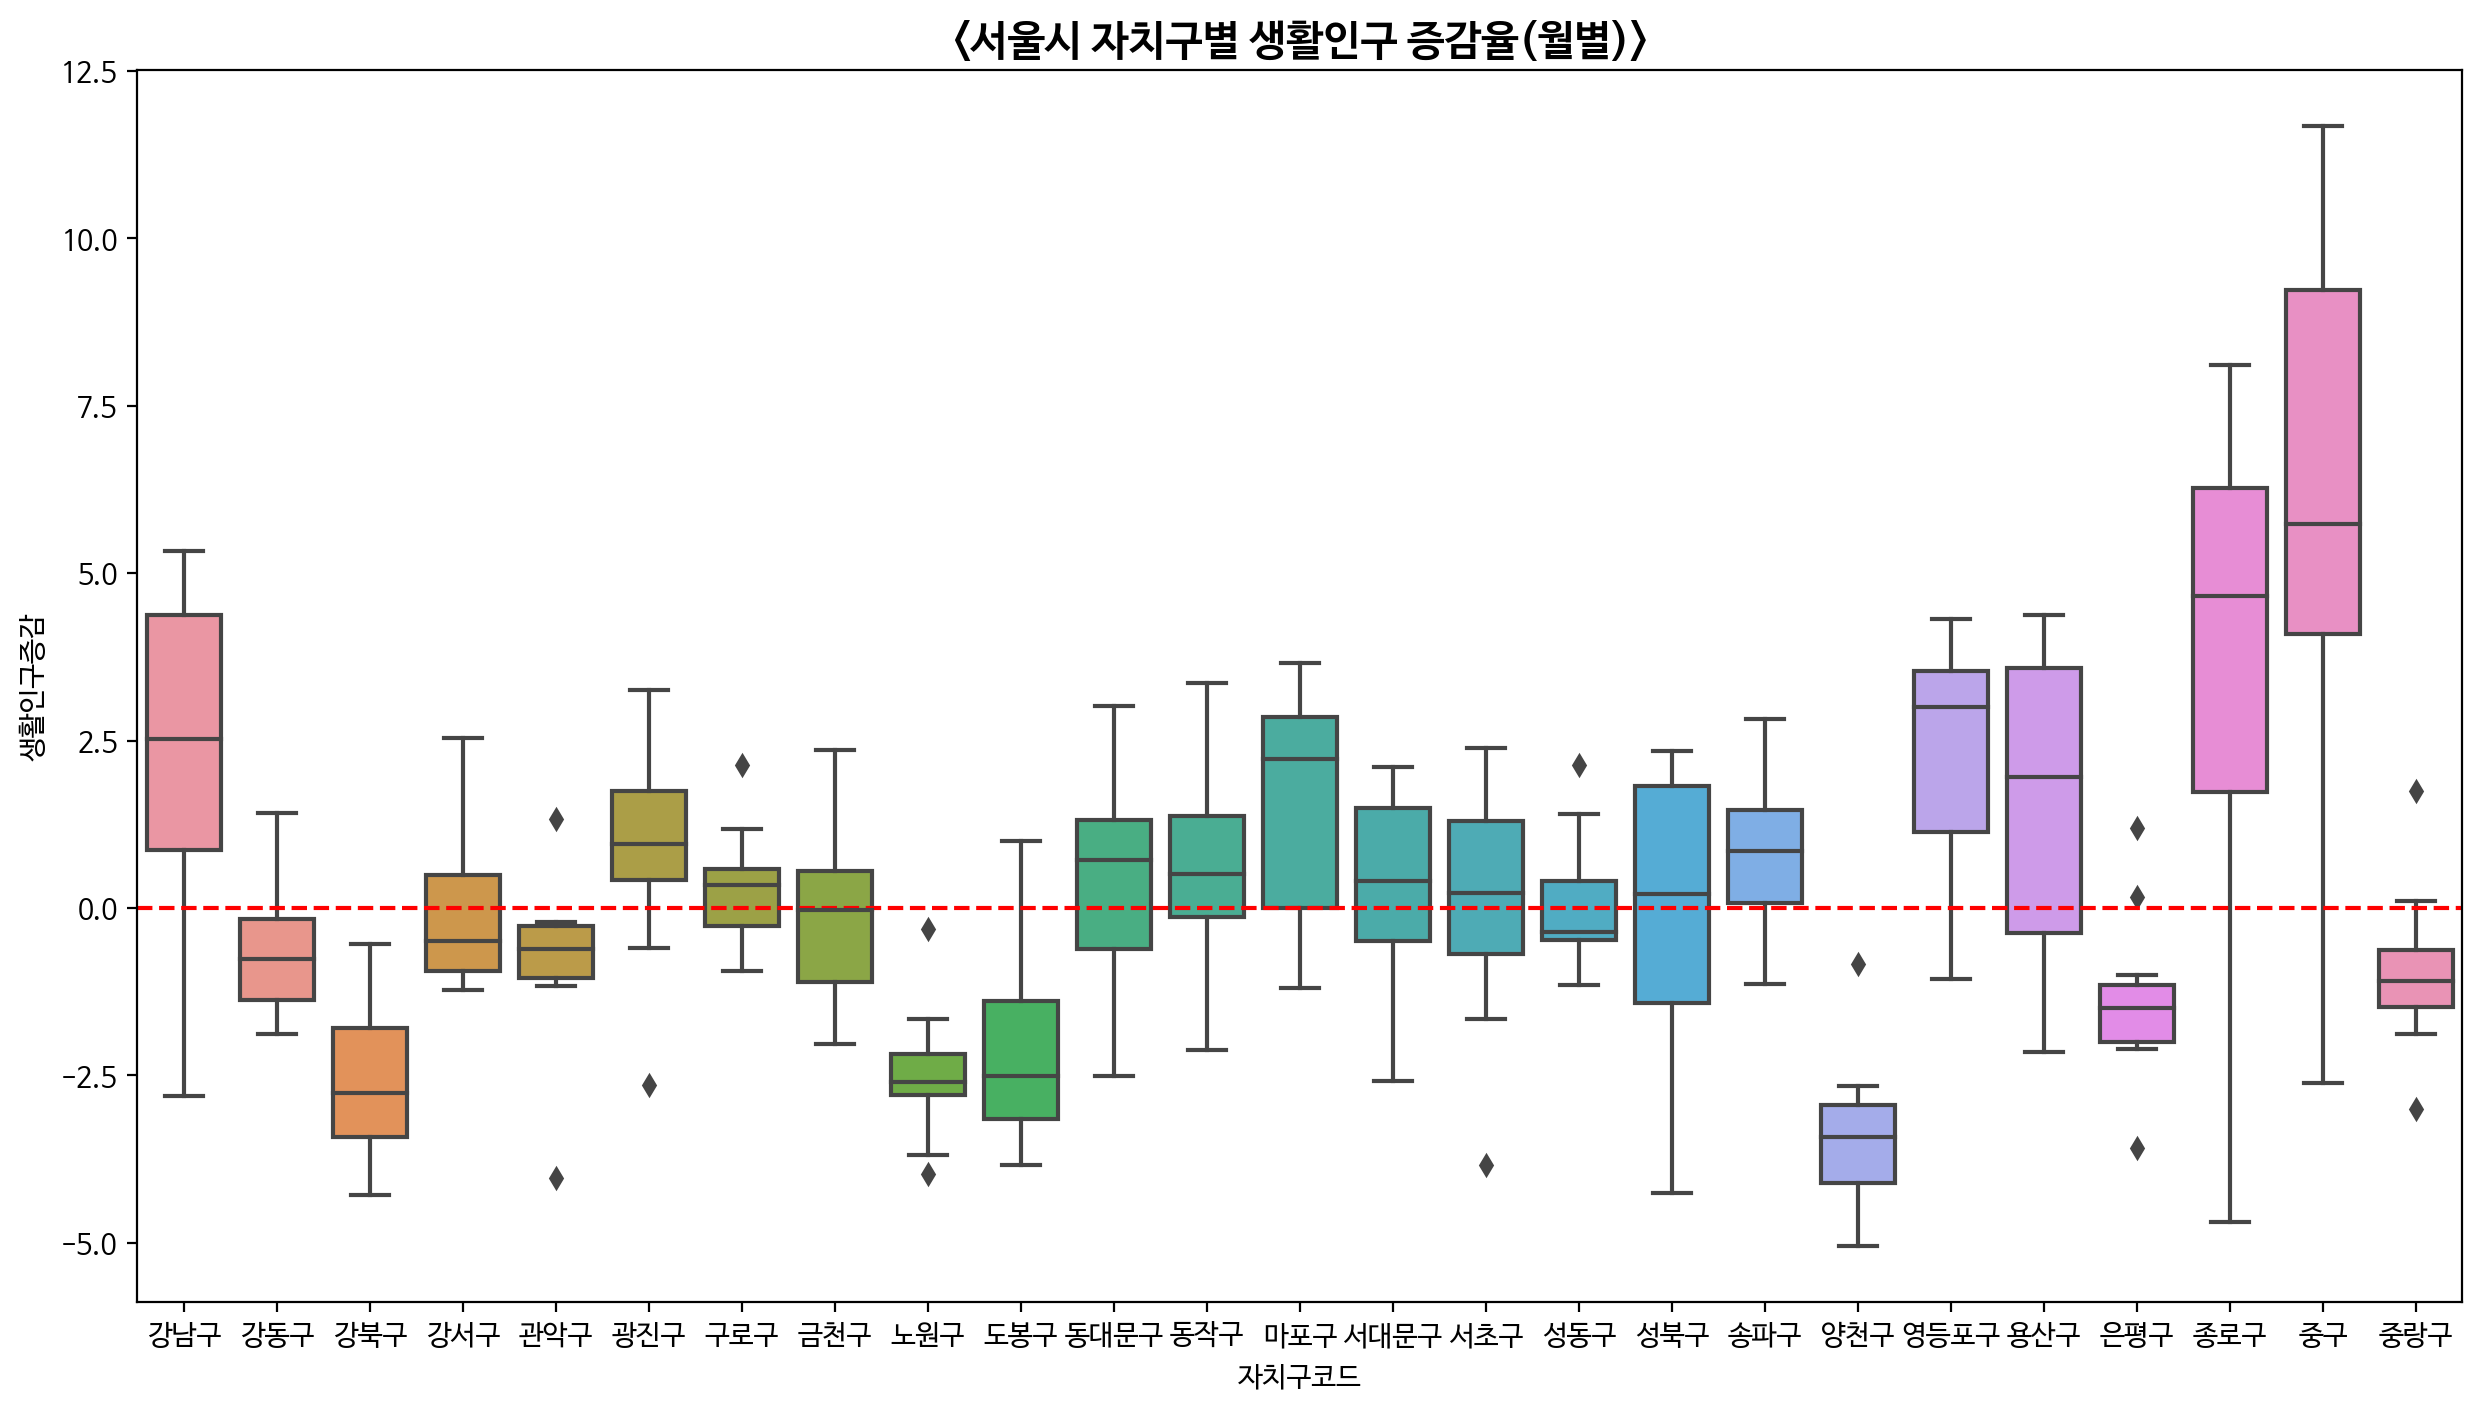

In [80]:
# 자치구별 생활인구 증감율(월별) 시각화
plt.figure(figsize = (15,8))
sns.boxplot(data = compare_2122, x = '자치구코드', y = '생활인구증감')
plt.title("<서울시 자치구별 생활인구 증감율(월별)>", fontsize = 15, fontweight = 'bold')
plt.axhline(0, linestyle = '--', color = 'r')
plt.show()

In [81]:
# sns.boxplot(data = df, x = '시간대구분', y = '총생활인구수')
# plt.show()

# 6.서울시 자치구별 외식 시장 현황 분석

- **'시장 성장성'**과 **'시장안정도'**를 기준으로 지역구별 시장 포지셔닝

- **시장 성장성** :
	- 정의 : 잠재적 소비자(생활인구)들의 유입이 높아지는 추세인 지역을 확인할 수 있는 지표
		* 평균 증가율이 높으면서 증가율의 분산이 낮은 지역(지속적으로 높은 성장세를 보이는 지역)을 시장 잠재성이 높은 지역으로 정의

	- 평가 지표 : 생활인구 성장지표
        - 생활인구 증가도  = 지역구별 생활인구의 월별 증가율(YoY)의 평균 / 증가율의 표준편차

	- 해석 :
        - 시장 성장성이 높은 지역은 안정적으로 생활인구가 증가하고 있는 지역으로서 소비시장의 규모가 커질 것으로 예상할 수 있음
		- 반대로 시장 성장성이 낮은 지역은 생활인구의 감소세가 보이는 지역으로 소비시장의 성장 둔화가 예상되는 지역

- 시장 경쟁도(포화도) :
	- 정의 : 지역구별 점포들의 경쟁 정도를 확인할 수 있는 지표
	- 평가 지표 : 지역구별 점포당 인구수
	- 해석 :
        - 시장 포화도 지표가 낮을수록, 한 점포를 방문할 수 있는 사람이 적다는 의미로 경쟁도가 높은 상황(과잉 경쟁)으로 해석 가능
        - 반대로 시장 포화도 지표가 높을수록, 한 점포를 방문할 수 있는 사람이 많다는 의미이기 때문에 경쟁도가 낮은 상황으로 해석됨


## 6.1 파생변수 생성
- 자치구별 성장성 지표
- 성장성 지표 = 생활인구증감의 평균 /  생활인구증감의 분산

In [82]:
# 자치구별 새오할인구증감 성장성을 새로운 파생변수로 추가
growth_2122 = compare_2122.groupby('자치구코드')['생활인구증감'].agg(['mean', 'std']).reset_index()
growth_2122['성장성'] = growth_2122['mean'] / growth_2122['std']

In [83]:
growth_2122.sort_values(by = '성장성', ascending = False)

,자치구코드,mean,std,성장성
19,영등포구,2.458829,1.643719,1.495894
23,중구,5.991090,4.368119,1.371549
12,마포구,1.570263,1.620548,0.968970
0,강남구,2.321267,2.411758,0.962479
22,종로구,3.669755,3.925753,0.934790
20,용산구,1.606253,2.231037,0.719958
17,송파구,0.843372,1.238282,0.681082
5,광진구,0.846738,1.467900,0.576836
6,구로구,0.303159,0.810372,0.374099
11,동작구,0.515236,1.501321,0.343188


In [84]:
# 새로운 파일로 저장
# growth_2122.to_csv('서울시_자치구별_생활인구_성장성.csv', index = False)

In [85]:
# people_growth = pd.read_csv("/content/drive/MyDrive/eda프로젝트/서울시_자치구별_생활인구_성장성.csv")

In [86]:
people_growth_sort = growth_2122.sort_values(by = '성장성', ascending = True)

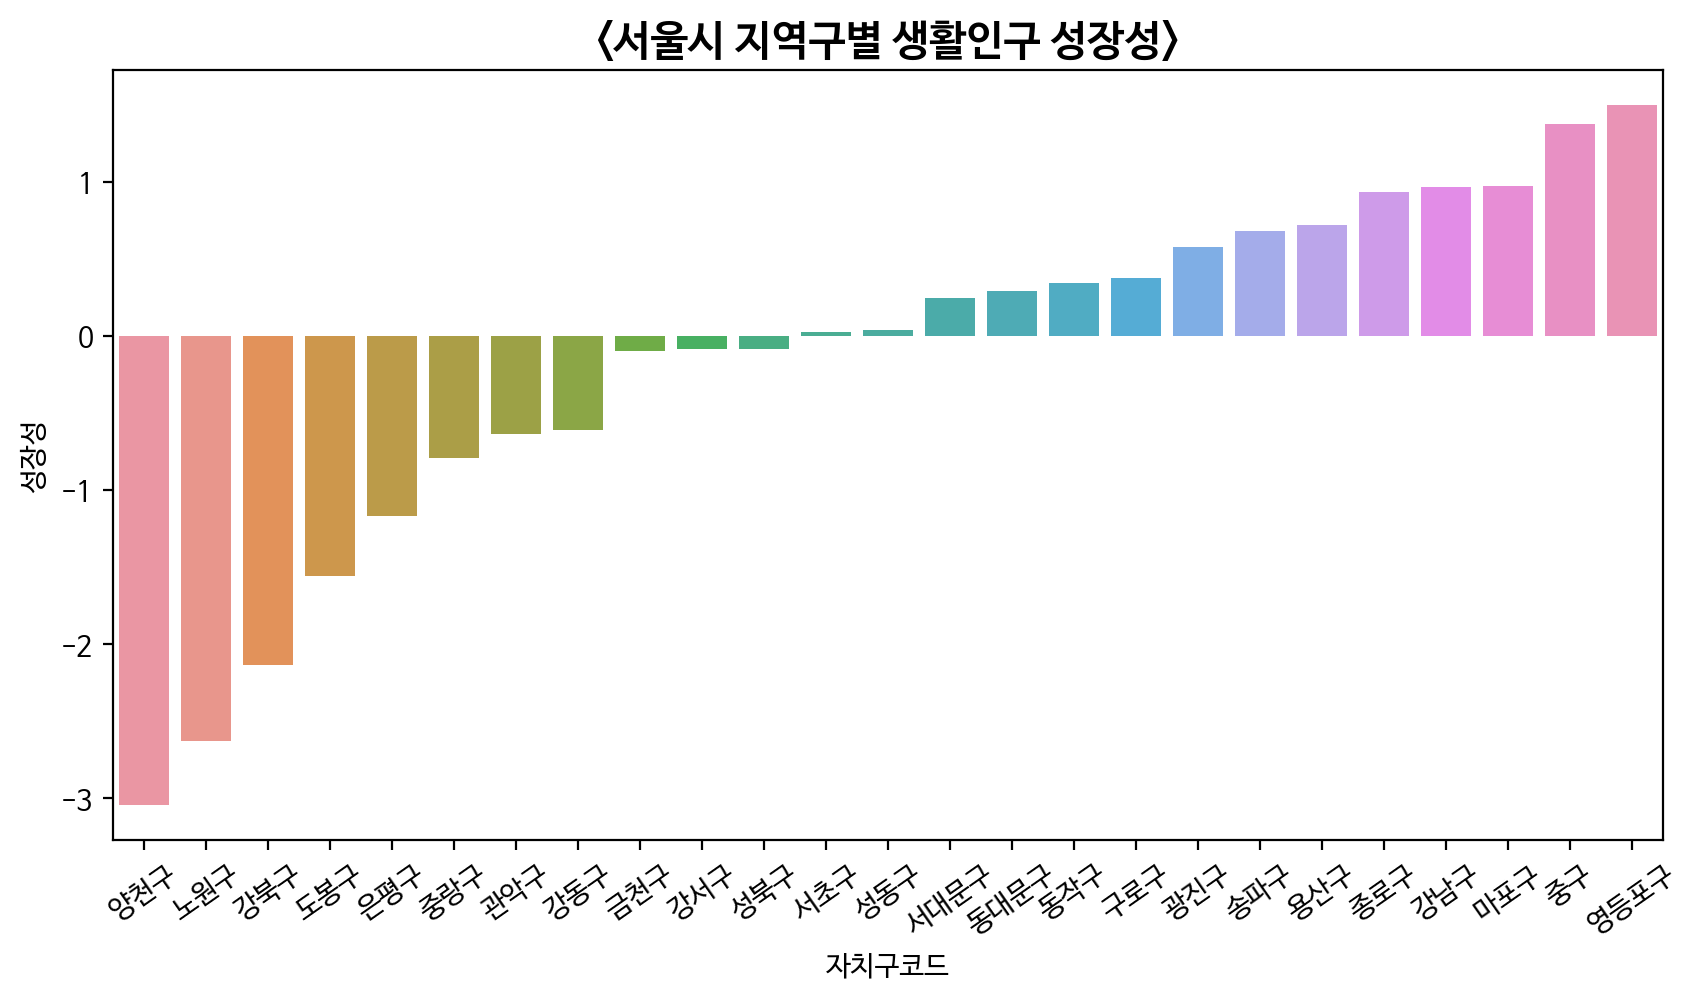

In [87]:
# 성장성 지표를 오름차순으로 정렬하고 시각화
plt.figure(figsize = (10,5))
sns.barplot(data = people_growth_sort, x = '자치구코드', y = '성장성')
plt.title("<서울시 지역구별 생활인구 성장성>", fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 35)
plt.show()

In [88]:
local_saturation = sigungu_over[['시군구명', '점포당인구']]
local_growth = people_growth_sort[['자치구코드', '성장성']].rename(columns = {'자치구코드':'시군구명'})

In [89]:
# 시장경쟁도(포화도) 데이터와 성장성 데이터 결합
local_positioning = local_saturation.merge(local_growth, on = '시군구명')
local_positioning.head(2)

,시군구명,점포당인구,성장성
0,노원구,123.92789,-2.625582
1,양천구,118.021612,-3.044490


In [90]:
# 각 지표의 평균값 산출
mean_sat = local_positioning['점포당인구'].mean()
mean_growth = local_positioning['성장성'].mean()

# 평균값을 기준으로 각 자치구를 세그먼트
def saturation_segmentation(saturation, mean_sat):
    return "공급 안정" if saturation > mean_sat else "과잉 공급"

def growth_segmentation(growth, mean_growth):
    return "높은 성장성" if growth > mean_growth else "낮은 성장성"

local_positioning["시장포화도"] = local_positioning["점포당인구"].apply(lambda x: saturation_segmentation(x,mean_sat))
local_positioning["시장성장성"] = local_positioning["성장성"].apply(lambda x: growth_segmentation(x, mean_growth))
local_positioning["지역별포지셔닝"] = local_positioning["시장포화도"] + ' & ' + local_positioning["시장성장성"]

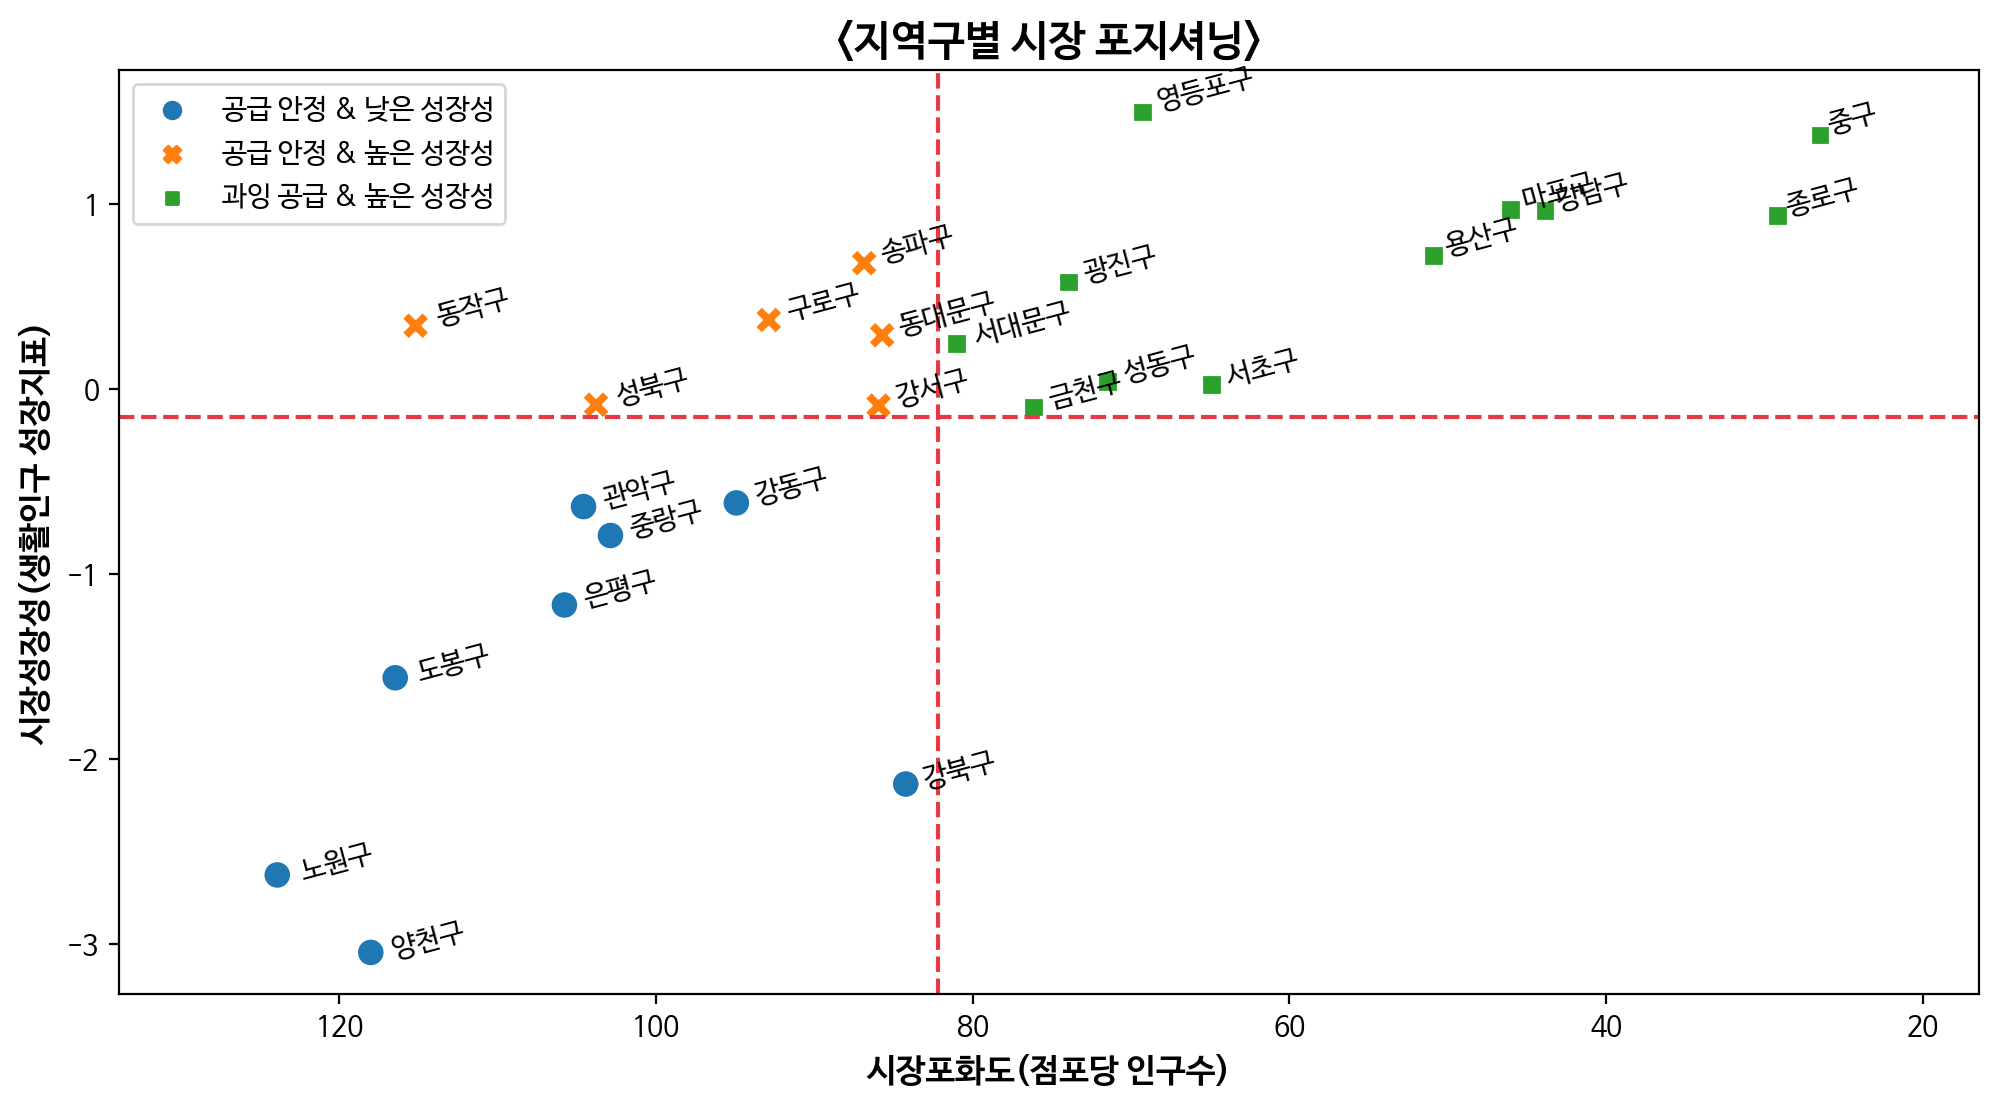

In [91]:
# 2개의 지표를 통해 자치구를 포지셔닝하는 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(data = local_positioning,
                x = "점포당인구",
                y = "성장성",
                hue = "지역별포지셔닝",
                style = "지역별포지셔닝",
                s = 100)
plt.axhline(y=mean_growth, color="#e63946", lw = 1.5, ls = "--")
plt.axvline(x=mean_sat, color = "#e63946", lw = 1.5, ls = "--")

for n in range(len(local_positioning)):
    # text 함수에서 text(x축 좌표, y축 좌표, 문자열)을 입력하여, 좌표에 comment를 추가
    plt.text(local_positioning['점포당인구'][n]*0.99, local_positioning['성장성'][n] * 1.01,
             local_positioning['시군구명'][n], fontsize = 10, fontdict = {'rotation': 15})

plt.title("<지역구별 시장 포지셔닝>", fontsize = 15, fontweight = "semibold")
plt.xlabel('시장포화도(점포당 인구수)',fontsize = 12, fontweight = "semibold" )
plt.ylabel('시장성장성(생활인구 성장지표)',fontsize = 12, fontweight = "semibold" )
plt.xlim(max(local_positioning['점포당인구']) + 10 , min(local_positioning['점포당인구']) - 10)
plt.legend()
plt.show()

## 6.2 시각화 및 결과 분석

- 25개의 자치구를 포지셔닝한 결과 3개의 유형으로 분류할 수 있었음
- 업종별 포지셔닝 결과와 달리 낮은 성장성을 기록하며 시장포화도가 높은 지역은 없었음

    - 공급 안정 & 낮은 성장성 :
        - 양천구, 노원구, 도봉구, 은평구, 중랑구, 관악구, 강동구, 강북구
        - -> 3순위
    - 공급 안정 & 높은 성장성 :
        - 동작구, 성북구, 구로구, 송파구, 동대문구, 강서구
        -  -> 1순위
    - 과잉 공급 & 높은 성장성 : 서대문구, 광진구, 금천구, 성동구, 서초구, 영등포구, 용산구, 마포구, 강남구, 종로구, 중구
        - -> 2순위

- 3개의 세그먼트를 통해 지역구를 평가하고 상권을 선택할 수 있을 것으로 기대됨
    - 경쟁이 낮으면서 높은 성장성을 보이고 있는 1순위 지역들을 우선적으로 창업 지역으로 선정할 수 있음
        - 송파구, 동작구, 구로구 등
    - 이후 추가적인 부동산 임대 데이터를 통해 경제성까지 고려한다면 안정적인 수익을 창출할 수 있는 상권 및 입지 선정으로 이어질 것으로 생각됨

# 7.지역구별 평균 임대료

- 사용 데이터 : 지역구별 상가 권리금 및 월세 데이터
	- 시점 : 2023년 8월 25일 기준
	- 지역 : 서울시 자치구별
	- 항목 : 자치구명, 권리금, 월세
	- 데이터수집 방법 : 웹스크래핑
    - 출처 : https://www.nemoapp.kr/Search?ArticleType=1&PageIndex=0&SWLng=126.78057037543684&SWLat=37.419442971813595&NELng=127.20407743923003&NELat=37.62302470281292&Zoom=12&mode=1&category=1&list=true&articleId=&dataType=

In [92]:
# 데이터 로드
gu_rent = pd.read_csv('/content/drive/MyDrive/eda프로젝트/지역구별_평균매매_임대료.csv')

In [93]:
# 컬럼명 변경
gu_rent.columns = ['시군구명', '권리금', '월세']

In [94]:
# 권리금 순으로 내림차순 정렬
gu_rent = gu_rent.sort_values('권리금', ascending = False).copy()

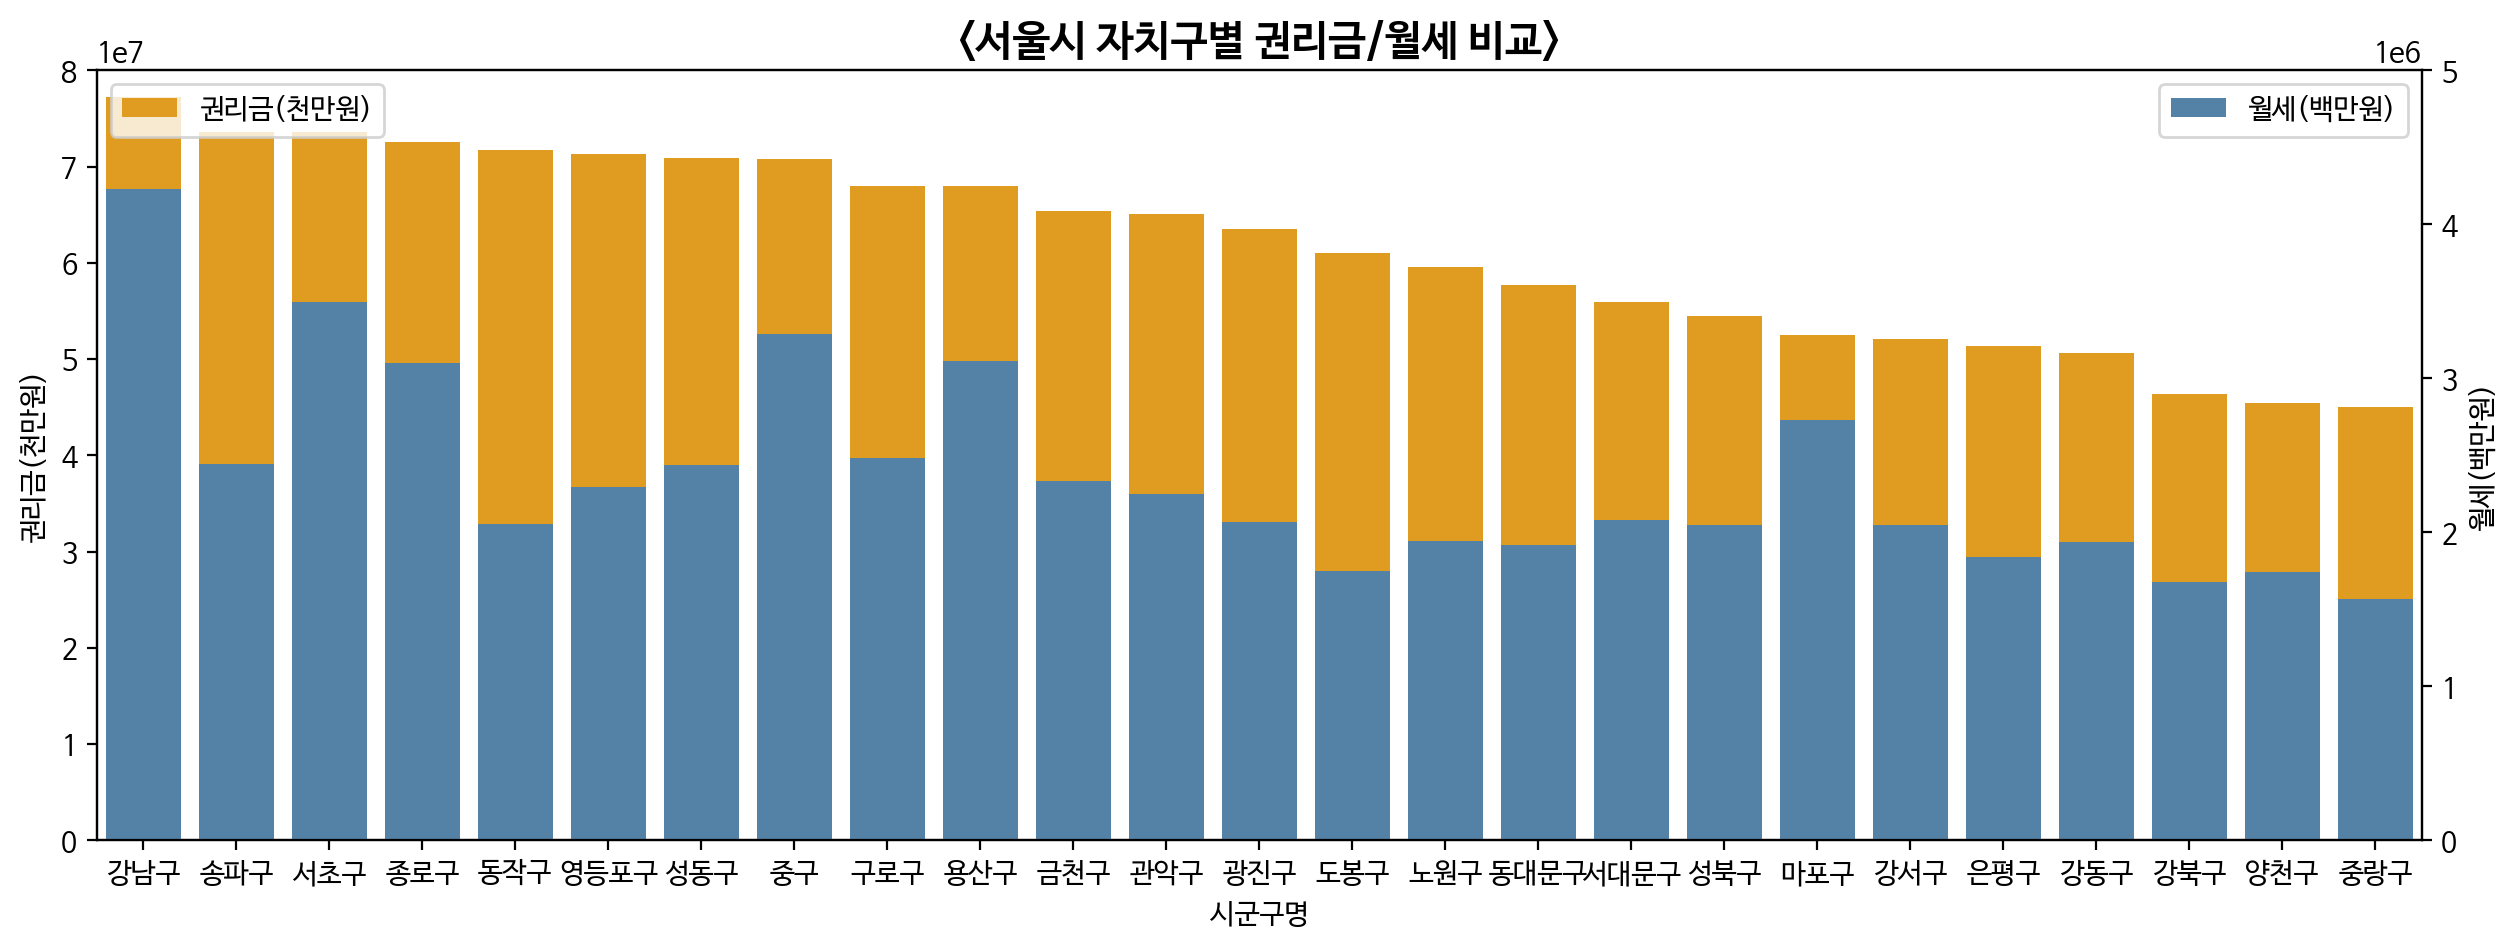

In [95]:
# 서울시 자치구별 권리금 월세 비교
plt.subplots(figsize = (15,5))
ax1 = sns.barplot(data = gu_rent, x = '시군구명', y = '권리금', color = 'orange', label = '권리금(천만원)')
ax1.set_ylabel('권리금(천만원)')
ax1.set_ylim(0, 80000000)
ax2 = ax1.twinx()
sns.barplot(data = gu_rent, x = '시군구명', y = '월세', color = 'steelblue', ax = ax2, label = '월세(백만원)')
ax2.set_ylabel('월세(백만원)')
plt.title("<서울시 자치구별 권리금/월세 비교>", fontsize = 15, fontweight = 'bold')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax2.set_ylim(0, 5000000)
plt.show()